# <a id="22">MVP Engenharia de Dados</a>

**Nome:** Daniel Vibranovski Costa

**Matrícula:** RA: 4052025001301 - Série: 1 Período: 1A Turma: 40530010006_20250_01

**Dataset:** [Global AI Job Market & Salary Trends 2025](https://www.kaggle.com/datasets/bismasajjad/global-ai-job-market-and-salary-trends-2025)

---
MVPs deste notebook:

1 - <a href="#0">MVP Análise de Dados e Boas Práticas</a>

2 - <a href="#10">MVP Machine Learning</a>

3 - <a href="#22">MVP Engenharia de Dados</a>

#### Agenda

* <a href="#23">Importação das Bibliotecas Necessárias e Carga de Dados</a>
* <a href="#24">Objetivo</a>
* <a href="#25">Descrição do Problema</a>
* <a href="#26">Hipóteses do Problema</a>
* <a href="#27">Coleta</a>
* <a href="#28">Modelagem</a>
  * <a href="#28.1">Catálogo de dados ou Atributos do dataset</a>
* <a href="#29">Carga de dados</a>
  * <a href="#29.1">Camada Bronze</a>
  * <a href="#29.2">Camada Prata</a>
  * <a href="#29.3">Camada Ouro</a>
* <a href="#30">Visualização dos resultados da ELT</a>
* <a href="#31">Análise Exploratória de Dados</a>
    * <a href="#31.2">Qualidade de dados</a>   
    * <a href="#31.3">Gráfico de Barra Vertical</a>
        * <a href="#31.3.1">Gráficos: Quantidade de Registros por País e Salário Médio por País</a>
        * <a href="#31.3.2">Gráficos: Modalidade de Trabalho e Salário Médio</a>
        * <a href="#31.3.3">Gráficos: Nível de Experiência e Anos de Experiência</a>
        * <a href="#31.3.4">Gráfico: Salário Médio por Quantidade de Skills</a>
    * <a href="#31.4">Pair Plot (Matriz de Dispersão)</a>
        * <a href="#31.4.1">Análise Salarial por Anos e Nível de Experiência</a>
    * <a href="#31.5">Gráfico de Pizza e Gráfico Treemap</a>
        * <a href="#31.5.1">Top 10 Skills mais Frequentes no Quartil Superior de Salários</a>
    * <a href="#31.6">Gráfico de Barra Horizontal de Composição Percentual</a>
        * <a href="#31.6.1">Distribuição Percentual por Faixa Salarial (USD)</a>
    * <a href="#31.7">Gráfico de Dispersão (Scatter Plot)</a>
        * <a href="#31.7.1">Desvio Padrão das Médias Salariais</a>
    * <a href="#31.8">Histograma</a>
        * <a href="#31.8.1">Distribuição de Salários por Tamanho de Empresa</a>
    * <a href="#31.9">Boxplot</a>
        * <a href="#31.9.1">Distribuição de Salários por Setor</a>
        * <a href="#31.9.2">Distribuição de Salários por Job Title (Área de Atuação)</a>
        * <a href="#31.9.3">Distribuição de Salários por Nível de Experiência</a>
    * <a href="#31.10">Matriz de Correlação</a>
        * <a href="#31.10.1">Matriz de Correlação das Características Numéricas</a>
* <a href="#32">Conclusão da Análise / Respostas das Hipóteses</a>
* <a href="#33">Autoavaliação</a>

## <a id="23">Importação das Bibliotecas Necessárias e Carga de Dados</a>

In [180]:
# =========================================
# Instalação de Dependências (apenas se necessário)
# =========================================
%pip install tabulate squarify kaggle

# =========================================
# Imports Principais (Spark / Python / ML)
# =========================================
from pyspark.sql import functions as F, types as T, Window
from pyspark.ml.feature import StringIndexer

import pandas as pd
import numpy as np
import os
import requests
import zipfile

# =========================================
# Visualização e Estilo Gráfico
# =========================================
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import matplotlib.colors as mcolors
from matplotlib.ticker import FuncFormatter

# =========================================
# Configuração de Ambiente Kaggle
# =========================================

# =========================================
# Download e Extração do Dataset (Kaggle)
# =========================================
!kaggle datasets download -d bismasajjad/global-ai-job-market-and-salary-trends-2025 -p /tmp/kaggle --unzip

# =========================================
# Configuração de Estilo Gráfico Global
# =========================================
plt.style.use("seaborn-v0_8")
sns.set_palette("coolwarm")
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["axes.grid"] = True

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Dataset URL: https://www.kaggle.com/datasets/bismasajjad/global-ai-job-market-and-salary-trends-2025
License(s): CC0-1.0




  0%|          | 0.00/1.08M [00:00<?, ?B/s]
100%|██████████| 1.08M/1.08M [00:00<00:00, 565MB/s]


---
<a href="#22">Início - MVP Engenharia de Dados</a>

<a href="#33">Fim - MVP Meachine Learning</a>

## <a id="24">Objetivo</a>

Agora no <a href="#22"><strong>MVP Engenharia de Dados</strong></a>, o objetivo principal é, a partir da plataforma de nuvem, estruturar uma pipeline, contemplando as etapas de extração, transformação, carregamento e orquestração dos dados do dataset [Global AI Job Market & Salary Trends 2025](https://www.kaggle.com/datasets/bismasajjad/global-ai-job-market-and-salary-trends-2025).

Nos outros MVPs, o objetivo foi:

No <a href="#0"><strong>MVP Análise de Dados e Boas Práticas</strong></a>, o objetivo principal foi analisar os fatores que influenciam a remuneração de empregos na área de inteligência artificial a partir do dataset [Global AI Job Market & Salary Trends 2025](https://www.kaggle.com/datasets/bismasajjad/global-ai-job-market-and-salary-trends-2025).

No <a href="#10"><strong>MVP Machine Learning</strong></a>, o objetivo principal foi, a partir de machine learning e seus principais modelos, prever os salários de empregos na área de inteligência artificial do dataset [Global AI Job Market & Salary Trends 2025](https://www.kaggle.com/datasets/bismasajjad/global-ai-job-market-and-salary-trends-2025).

![alt text](https://www.unit.br/hs-fs/hubfs/Tipos%20de%20engenheiros.jpg?width=1000&name=Tipos%20de%20engenheiros.jpg)

---
<a href="#22">Início - MVP Engenharia de Dados</a>

<a href="#33">Fim - MVP Meachine Learning</a>

## <a id="25">Descrição do Problema</a>

O dataset [Global AI Job Market & Salary Trends 2025](https://www.kaggle.com/datasets/bismasajjad/global-ai-job-market-and-salary-trends-2025) é um conjunto de dados que oferece uma análise abrangente do mercado de trabalho em inteligência artificial, com mais de 15.000 vagas reais coletadas nas principais plataformas de emprego do mundo. Ele inclui informações detalhadas sobre salários, requisitos das vagas, insights sobre as empresas e tendências geográficas.

O objetivo principal deste MVP é analisar os fatores que influenciam a remuneração de empregos na área de inteligência artificial a partir do dataset [Global AI Job Market & Salary Trends 2025](https://www.kaggle.com/datasets/bismasajjad/global-ai-job-market-and-salary-trends-2025).


---
<a href="#22">Início - MVP Engenharia de Dados</a>

<a href="#33">Fim - MVP Meachine Learning</a>

## <a id="26">Hipóteses do Problema</a>

As hipóteses que tracei são as seguintes:

1. A localização geográfica da companhia seria um fator que influencia no salário do profissional de IA?
2. Existe diferença no salário entre profissionais de IA que trabalham de maneira remota, híbrida ou presencial?
3. A exigência do maior número de competências técnicas (quantidade de skills) está relacionada a um aumento proporcional na remuneração?
4. Há similaridades de skills entre os profissionais de IA mais bem remunerados?
5. Existe alguma correlação entre o tamanho da empresa e o salário do profissional de IA?
6. O setor da empresa altera o salário do profissional de IA?
7. Os profissionais de diferentes ramificações da IA tem remunerações diferentes?
8. O nível de experiência do profissional de IA (Júnior/Iniciante, Pleno, Sênior, Executivo/Diretor) e os anos de experiência influenciam o salário?

---
<a href="#22">Início - MVP Engenharia de Dados</a>

<a href="#33">Fim - MVP Meachine Learning</a>

## <a id="27">Coleta</a>

Os dados utilizados neste projeto foram extraídos da plataforma **Kaggle**, a partir do dataset [Global AI Job Market and Salary Trends 2025](https://www.kaggle.com/datasets/bismasajjad/global-ai-job-market-and-salary-trends-2025). A escolha deste conjunto de dados se deu pela sua relevância para a análise do mercado de trabalho global na área de Inteligência Artificial, contendo informações detalhadas sobre cargos, níveis de experiência, localização e faixas salariais. A extração foi realizada por meio da **API oficial do Kaggle**, que permite o acesso programático a datasets públicos diretamente a partir de scripts Python, garantindo automação e reprodutibilidade no processo de coleta.

Para realizar a extração via **API Kaggle**, foi necessário seguir algumas etapas essenciais: (1) gerar um **Token de autenticação** no perfil do Kaggle (em *Account → Create New API Token*), o que gera o arquivo `kaggle.json` contendo as credenciais de acesso; (2) armazenar esse arquivo no diretório apropriado do sistema (geralmente em `~/.kaggle/`); (3) instalar o pacote `kaggle` via `pip install kaggle`; e (4) utilizar o comando `kaggle datasets download -d bismasajjad/global-ai-job-market-and-salary-trends-2025` para efetuar o download do dataset em formato CSV. Após a extração, o arquivo foi **convertido de CSV para o formato Delta** utilizando o **Databricks**, visando otimizar o armazenamento e o processamento distribuído dos dados, garantindo maior eficiência em consultas e transformações subsequentes.


---
<a href="#22">Início - MVP Engenharia de Dados</a>

<a href="#33">Fim - MVP Meachine Learning</a>

## <a id="28">Modelagem</a>

Para a modelagem dos dados do projeto, foi escolhida uma **arquitetura Data Lake** com estrutura **flat**, visando flexibilidade, escalabilidade e facilidade de integração com diferentes fontes de dados. Esse tipo de arquitetura permite o armazenamento de grandes volumes de informações em formato bruto, sem a necessidade de um esquema pré-definido, favorecendo a exploração analítica e o versionamento dos dados de forma eficiente. Essa abordagem simplificada também facilita a implementação de pipelines modernos de dados, especialmente em ambientes distribuídos como o **Databricks**.

Para o armazenamento e processamento, adotou-se a **arquitetura em camadas do tipo Medalhão (Bronze, Silver e Gold)**, que é uma variação da arquitetura flat voltada à organização e qualidade dos dados. Essa estrutura está intimamente relacionada ao fluxo **ELT (Extract, Load, Transform)**, e não ao tradicional **ETL**, uma vez que os dados são primeiramente extraídos e carregados em seu estado bruto (camada Bronze) para, em seguida, serem transformados e refinados diretamente dentro do ambiente do Data Lake (camadas Silver e Gold). Essa estratégia potencializa o desempenho, simplifica a manutenção e aproveita os recursos computacionais do ambiente de processamento em larga escala.


---
<a href="#22">Início - MVP Engenharia de Dados</a>

<a href="#33">Fim - MVP Meachine Learning</a>

## <a id="29">Carga de dados</a>

### <a id="29.1">Camada Bronze</a>
A camada Bronze é a primeira etapa da arquitetura Medalhão, responsável por armazenar os dados brutos exatamente como foram extraídos das fontes originais, sem qualquer tipo de tratamento.
Seu principal objetivo é preservar a integridade e rastreabilidade dos dados, servindo como base para as etapas posteriores de limpeza e transformação.

In [181]:
import os
import requests
import zipfile

# ===============================
# Credenciais do Kaggle
# ===============================
os.environ["KAGGLE_USERNAME"] = "danielvibranovski"
os.environ["KAGGLE_KEY"] = "2ae7ab028b67e855b011814af716604f"

# ===============================
# Caminho da pasta do repositório
# (usa o diretório atual do notebook)
# ===============================
repo_base_path = os.getcwd()  # diretório onde o notebook está
bronze_dir = os.path.join(repo_base_path, "camada_bronze")

# Cria a pasta camada_bronze se não existir
os.makedirs(bronze_dir, exist_ok=True)

# ===============================
# Dataset do Kaggle
# ===============================
dataset_url = (
    "https://www.kaggle.com/api/v1/datasets/download/"
    "bismasajjad/global-ai-job-market-and-salary-trends-2025"
)

zip_path = os.path.join(bronze_dir, "kaggle_dataset.zip")

# ===============================
# Download do ZIP direto para camada_bronze
# ===============================
response = requests.get(
    dataset_url,
    headers={"User-Agent": "Mozilla/5.0"},
    stream=True
)
response.raise_for_status()  # dispara erro se o download falhar

with open(zip_path, "wb") as f:
    for chunk in response.iter_content(chunk_size=8192):
        if chunk:
            f.write(chunk)

# ===============================
# Descompactar o ZIP na camada_bronze
# ===============================
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(bronze_dir)

# (Opcional) Renomear o primeiro CSV encontrado para um nome padrão
csv_novo_nome = "global_ai_job_market_raw.csv"
csv_encontrado = None

for arquivo in os.listdir(bronze_dir):
    if arquivo.lower().endswith(".csv"):
        csv_encontrado = os.path.join(bronze_dir, arquivo)
        break

if csv_encontrado is not None:
    destino = os.path.join(bronze_dir, csv_novo_nome)
    # Se já existir um arquivo com esse nome, pode sobrescrever
    os.replace(csv_encontrado, destino)
    print(f"✅ CSV salvo em: {destino}")
else:
    print("⚠ Nenhum arquivo CSV foi encontrado após a extração.")

print("✅ Dataset baixado e descompactado na pasta camada_bronze do repositório:")
print(bronze_dir)

✅ CSV salvo em: c:\Users\Daniel\OneDrive\Documentos\estudos\@Pós-Graduação - Ciência de Dados e Analytics\03 - Engenharia de Dados\1 - OS 3 MVPs JUNTOS\camada_bronze\global_ai_job_market_raw.csv
✅ Dataset baixado e descompactado na pasta camada_bronze do repositório:
c:\Users\Daniel\OneDrive\Documentos\estudos\@Pós-Graduação - Ciência de Dados e Analytics\03 - Engenharia de Dados\1 - OS 3 MVPs JUNTOS\camada_bronze


### <a id="28.1">Catálogo de dados ou Atributos do dataset</a>

#### Resumo dos atributos do dataset

- Possui 15.000 vagas de emprego em mais de 50 países
- Dados salariais em várias moedas (normalizados para USD)
- Classificação por nível de experiência (Júnior/Iniciante, Pleno/Intermediário, Sênior, Executivo/Diretor)
- Análise do impacto do tamanho da empresa
- Tendências e padrões de trabalho remoto
- Análise da demanda por habilidades
- Variações salariais por região geográfica
- Dados em série temporal mostrando a evolução do mercado

#### Dicionário de Variáveis da Base de Dados:

| **Nome Original**           | **Descrição Detalhada**                                                                                       |
|------------------------------|----------------------------------------------------------------------------------------------------------------|
| **job_id**                   | Identificador único do cargo/trabalho com um código alfanumérico usado para diferenciar cada registro. Exemplos: AI00001, AI00002. |
| **job_title**                | Título do cargo ou função desempenhada pelo profissional de IA. Exemplos: AI Research Scientist, Data Analyst, Machine Learning Engineer. |
| **salary_usd**               | Salário anual do profissional, expresso em dólares americanos (USD).                                         |
| **salary_currency**          | Moeda em que o salário foi originalmente informado. Exemplos: USD (Dólar), EUR (Euro), GBP (Libra).          |
| **experience_level**         | Nível de experiência no cargo. Exemplos: EN → Entry-level (Júnior), MI → Mid-level (Pleno), SE → Senior-level (Sênior), EX → Executive-level (Executivo). |
| **employment_type**          | Tipo de contrato de trabalho. Exemplos: CT → Contractor, FL → Freelancer, PT → Part-time, FT → Full-time.   |
| **company_location**         | Localização da empresa. Exemplos: United States, Germany, India, Japan, United Kingdom, etc.                 |
| **company_size**             | Porte da empresa. Exemplos: S → Small (Pequena), M → Medium (Média), L → Large (Grande).                     |
| **employee_residence**       | Local de residência do profissional.                                                                         |
| **remote_ratio**             | Modalidade de trabalho (percentual remoto). Exemplos: 0 → Presencial, 50 → Híbrido, 100 → Remoto.           |
| **required_skills**          | Lista de habilidades técnicas exigidas. Exemplos: Python, SQL, TensorFlow, Kubernetes, etc.                 |
| **education_required**       | Nível educacional exigido. Exemplos: Associate, Bachelor, Master, PhD.                                      |
| **years_experience**         | Número de anos de experiência do profissional (0 a 19 anos).                                                |
| **industry**                 | Setor da empresa. Exemplos: Finance, Technology, Healthcare, Automotive, Retail, etc.                      |
| **posting_date**             | Data de publicação da vaga.                                                                                 |
| **application_deadline**     | Data limite para candidatura.                                                                               |
| **job_description_length**   | Comprimento (em caracteres) da descrição da vaga.                                                           |
| **benefits_score**           | Pontuação referente aos benefícios oferecidos na vaga.                                                      |
| **company_name**             | Nome da empresa.                                                                                            |

In [182]:
import pandas as pd
import os

# Caminho absoluto para a camada_bronze
csv_path = os.path.join(os.getcwd(), "camada_bronze", "global_ai_job_market_raw.csv")

# Leitura do CSV com Pandas (sem spark!)
df_bronze = pd.read_csv(csv_path)

print("✅ CSV carregado com sucesso!")
print(f"Arquivo lido: {csv_path}\n")

# Tipos de dados por coluna
print("Tipos de dados por coluna:")
for nome, tipo in df_bronze.dtypes.items():
    print(f" - {nome}: {tipo}")

df_bronze.info()

✅ CSV carregado com sucesso!
Arquivo lido: c:\Users\Daniel\OneDrive\Documentos\estudos\@Pós-Graduação - Ciência de Dados e Analytics\03 - Engenharia de Dados\1 - OS 3 MVPs JUNTOS\camada_bronze\global_ai_job_market_raw.csv

Tipos de dados por coluna:
 - job_id: object
 - job_title: object
 - salary_usd: int64
 - salary_currency: object
 - experience_level: object
 - employment_type: object
 - company_location: object
 - company_size: object
 - employee_residence: object
 - remote_ratio: int64
 - required_skills: object
 - education_required: object
 - years_experience: int64
 - industry: object
 - posting_date: object
 - application_deadline: object
 - job_description_length: int64
 - benefits_score: float64
 - company_name: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null 

---
<a href="#22">Início - MVP Engenharia de Dados</a>

<a href="#33">Fim - MVP Meachine Learning</a>

### <a id="29.2">Camada Prata</a>
A camada Prata é responsável por processar e transformar os dados brutos da camada Bronze, aplicando limpezas, padronizações e validações de qualidade.  
Nessa etapa, os dados tornam-se estruturados e prontos para análises intermediárias ou integrações com outras fontes.  

In [183]:
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler

# =========================
# Caminhos camada Bronze / Prata
# =========================
base_dir = os.getcwd()  # diretório do repo / notebook
bronze_path = os.path.join(base_dir, "camada_bronze", "global_ai_job_market_raw.csv")

prata_dir = os.path.join(base_dir, "camada_prata")
os.makedirs(prata_dir, exist_ok=True)
prata_path = os.path.join(prata_dir, "global_ai_job_market_prata.csv")

# =========================
# Leitura do CSV da camada Bronze (SEM Spark)
# =========================
df_bronze = pd.read_csv(bronze_path)
print("✅ df_bronze carregado a partir de:", bronze_path)
print("Formato Bronze:", df_bronze.shape)

# =========================
# CONFIG
# =========================
ID_COL = "id"  # se houver
NUMERIC_COLS = ["experience_years", "remote_ratio", "company_revenue"]
EXCLUDED_FROM_SCALING = ["remote_ratio"]  # colunas numéricas que NÃO serão padronizadas

# colunas obrigatórias (não podem ser nulas)
REQUIRED_COLS = NUMERIC_COLS + ["required_skills"]

# =========================
# Utils em pandas
# =========================
def remove_columns(df, cols_to_remove):
    """
    Remove colunas se existirem.
    """
    if not cols_to_remove:
        return df
    cols_existentes = [c for c in cols_to_remove if c in df.columns]
    return df.drop(columns=cols_existentes, errors="ignore")


def drop_na_rows(df, subset_cols):
    """
    Remove linhas com nulos em subset_cols (apenas nas que existirem no DF).
    """
    existing = [c for c in subset_cols if c in df.columns]
    if not existing:
        return df
    return df.dropna(subset=existing)


def ensure_numeric_columns(df, numeric_cols):
    """
    Garante que colunas numéricas estejam em tipo numérico (float),
    convertendo strings com vírgula para ponto.
    """
    df = df.copy()
    for col in numeric_cols:
        if col in df.columns:
            if df[col].dtype == "O":  # objeto / string
                df[col] = (
                    df[col]
                    .astype(str)
                    .str.replace(",", ".", regex=False)  # troca vírgula por ponto
                )
            df[col] = pd.to_numeric(df[col], errors="coerce")
    return df


def scale_numeric_single_df(df, numeric_cols, exclude_cols=None):
    """
    Padroniza colunas numéricas (mean=0, std=1) e substitui
    as colunas originais pelos valores escalados.
    """
    exclude_cols = exclude_cols or []
    use_cols = [c for c in numeric_cols if c in df.columns and c not in exclude_cols]

    if not use_cols:
        return df

    df = df.copy()
    scaler = StandardScaler(with_mean=True, with_std=True)
    scaled_values = scaler.fit_transform(df[use_cols])
    df[use_cols] = scaled_values

    return df

# =========================
# Pipeline — Dataset Único (em pandas)
# =========================
def processing_pipeline_dataset(
    df,
    cols_to_remove=None,
    required_cols=REQUIRED_COLS,
    numeric_cols=NUMERIC_COLS,
    exclude_from_scaling=EXCLUDED_FROM_SCALING,
):
    """
    1) (Opcional) Remove colunas
    2) Garante tipos numéricos corretos
    3) Drop de nulos nas colunas requeridas
    4) StandardScaler apenas nas colunas numéricas permitidas
    """
    out = df.copy()

    # 1) Remove colunas, se houver
    if cols_to_remove:
        out = remove_columns(out, cols_to_remove)

    # 2) Garante que colunas numéricas sejam numéricas
    out = ensure_numeric_columns(out, numeric_cols)

    # 3) Remove linhas com nulos nas colunas obrigatórias
    out = drop_na_rows(out, required_cols)

    # 4) Escala colunas numéricas (exceto as excluídas)
    out = scale_numeric_single_df(out, numeric_cols, exclude_cols=exclude_from_scaling)

    return out

# =========================
# Executa pipeline Bronze -> Prata
# =========================
df_prata = processing_pipeline_dataset(df_bronze)

# =========================
# Salva CSV na camada Prata
# =========================
df_prata.to_csv(prata_path, index=False)
print("\n✅ df_prata salvo em:", prata_path)
print("Formato Prata:", df_prata.shape)

df_prata.info()

✅ df_bronze carregado a partir de: c:\Users\Daniel\OneDrive\Documentos\estudos\@Pós-Graduação - Ciência de Dados e Analytics\03 - Engenharia de Dados\1 - OS 3 MVPs JUNTOS\camada_bronze\global_ai_job_market_raw.csv
Formato Bronze: (15000, 19)

✅ df_prata salvo em: c:\Users\Daniel\OneDrive\Documentos\estudos\@Pós-Graduação - Ciência de Dados e Analytics\03 - Engenharia de Dados\1 - OS 3 MVPs JUNTOS\camada_prata\global_ai_job_market_prata.csv
Formato Prata: (15000, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  obje

---
<a href="#22">Início - MVP Engenharia de Dados</a>

<a href="#33">Fim - MVP Meachine Learning</a>

### <a id="29.3">Camada Ouro</a>
A camada Ouro contém os dados já consolidados e prontos para consumo analítico, sendo o resultado final do processo de transformação.  
Aqui, as informações estão refinadas, agregadas e modeladas para atender às necessidades de relatórios, dashboards e análises de negócio.  

In [184]:
import os
import pandas as pd
import numpy as np

# =========================
# Caminhos camada Prata / Ouro
# =========================
base_dir = os.getcwd()  # diretório do repo / notebook

prata_path = os.path.join(base_dir, "camada_prata", "global_ai_job_market_prata.csv")

ouro_dir = os.path.join(base_dir, "camada_ouro")
os.makedirs(ouro_dir, exist_ok=True)
ouro_path = os.path.join(ouro_dir, "global_ai_job_market_ouro.csv")

# 1️⃣ Ler a camada prata (CSV)
df_prata = pd.read_csv(prata_path)
print("✅ df_prata carregado a partir de:", prata_path)
print("Formato Prata:", df_prata.shape)

# 2️⃣ Selecionar as colunas desejadas
selected_cols = [
    "id",
    "experience_years",
    "remote_ratio",
    "company_revenue",
    "required_skills"
]

# Garante que só usa colunas que realmente existem
cols_existentes = [c for c in selected_cols if c in df_prata.columns]
df_ouro = df_prata[cols_existentes].copy()

# 3️⃣ (Opcional) adicionar metadados / colunas derivadas
# remote_category com mesma lógica do Spark
if "remote_ratio" in df_ouro.columns:
    df_ouro["remote_category"] = np.select(
        [
            df_ouro["remote_ratio"] == 100,
            df_ouro["remote_ratio"] >= 50,
        ],
        [
            "Totalmente Remoto",
            "Parcialmente Remoto",
        ],
        default="Presencial",
    )

# 4️⃣ Salvar a nova camada ouro em CSV
df_ouro.to_csv(ouro_path, index=False)

print("\n✅ df_ouro salvo em:", ouro_path)
print("Formato Ouro:", df_ouro.shape)

df_ouro.info()

✅ df_prata carregado a partir de: c:\Users\Daniel\OneDrive\Documentos\estudos\@Pós-Graduação - Ciência de Dados e Analytics\03 - Engenharia de Dados\1 - OS 3 MVPs JUNTOS\camada_prata\global_ai_job_market_prata.csv
Formato Prata: (15000, 19)

✅ df_ouro salvo em: c:\Users\Daniel\OneDrive\Documentos\estudos\@Pós-Graduação - Ciência de Dados e Analytics\03 - Engenharia de Dados\1 - OS 3 MVPs JUNTOS\camada_ouro\global_ai_job_market_ouro.csv
Formato Ouro: (15000, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   remote_ratio     15000 non-null  int64 
 1   required_skills  15000 non-null  object
 2   remote_category  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


---
<a href="#22">Início - MVP Engenharia de Dados</a>

<a href="#33">Fim - MVP Meachine Learning</a>

## <a id="30">Visualização dos resultados da ELT</a>

In [185]:
df_bronze.head(10)

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics
5,AI00006,AI Architect,123574,EUR,SE,CT,Germany,M,Germany,50,"Data Visualization, R, SQL, Linux",Associate,7,Healthcare,2024-08-31,2024-10-04,819,5.9,Neural Networks Co
6,AI00007,Principal Data Scientist,79670,GBP,MI,FL,United Kingdom,S,United Kingdom,0,"R, Docker, MLOps",Associate,3,Gaming,2024-12-29,2025-02-28,1936,6.3,DataVision Ltd
7,AI00008,NLP Engineer,70640,EUR,EN,FL,France,L,France,0,"Python, SQL, Computer Vision, Java, Azure",Master,0,Healthcare,2024-06-07,2024-07-01,1286,7.6,Cloud AI Solutions
8,AI00009,Data Analyst,160710,USD,SE,CT,Singapore,L,Singapore,0,"Hadoop, Git, Mathematics, Python",PhD,7,Government,2024-11-04,2024-11-24,551,9.3,Quantum Computing Inc
9,AI00010,AI Software Engineer,102557,USD,SE,PT,Austria,M,Austria,0,"MLOps, GCP, Scala, Azure, Linux",Master,5,Government,2024-10-20,2024-11-06,2340,5.8,Cloud AI Solutions


In [186]:
df_prata.head(10)

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics
5,AI00006,AI Architect,123574,EUR,SE,CT,Germany,M,Germany,50,"Data Visualization, R, SQL, Linux",Associate,7,Healthcare,2024-08-31,2024-10-04,819,5.9,Neural Networks Co
6,AI00007,Principal Data Scientist,79670,GBP,MI,FL,United Kingdom,S,United Kingdom,0,"R, Docker, MLOps",Associate,3,Gaming,2024-12-29,2025-02-28,1936,6.3,DataVision Ltd
7,AI00008,NLP Engineer,70640,EUR,EN,FL,France,L,France,0,"Python, SQL, Computer Vision, Java, Azure",Master,0,Healthcare,2024-06-07,2024-07-01,1286,7.6,Cloud AI Solutions
8,AI00009,Data Analyst,160710,USD,SE,CT,Singapore,L,Singapore,0,"Hadoop, Git, Mathematics, Python",PhD,7,Government,2024-11-04,2024-11-24,551,9.3,Quantum Computing Inc
9,AI00010,AI Software Engineer,102557,USD,SE,PT,Austria,M,Austria,0,"MLOps, GCP, Scala, Azure, Linux",Master,5,Government,2024-10-20,2024-11-06,2340,5.8,Cloud AI Solutions


In [187]:
df_ouro.head(10)

,remote_ratio,required_skills,remote_category
0,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Parcialmente Remoto
1,100,"Deep Learning, AWS, Mathematics, Python, Docker",Totalmente Remoto
2,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Presencial
3,50,"Scala, SQL, Linux, Python",Parcialmente Remoto
4,100,"MLOps, Java, Tableau, Python",Totalmente Remoto
5,50,"Data Visualization, R, SQL, Linux",Parcialmente Remoto
6,0,"R, Docker, MLOps",Presencial
7,0,"Python, SQL, Computer Vision, Java, Azure",Presencial
8,0,"Hadoop, Git, Mathematics, Python",Presencial
9,0,"MLOps, GCP, Scala, Azure, Linux",Presencial


---
<a href="#22">Início - MVP Engenharia de Dados</a>

<a href="#33">Fim - MVP Meachine Learning</a>

## <a id="31">Análise Exploratória de Dados</a>

### <a id="31.2">Qualidade de dados</a>
Será analisada a camada bronze, pois trata-se do dado bruto, sendo possível analisar a qualidade dos dados extraídos

In [188]:
df_bronze.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

In [189]:
df_bronze.describe()

,salary_usd,remote_ratio,years_experience,job_description_length,benefits_score
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,115348.965133,49.483333,6.253200,1503.314733,7.504273
std,60260.940438,40.812712,5.545768,576.127083,1.450870
min,32519.000000,0.000000,0.000000,500.000000,5.000000
25%,70179.750000,0.000000,2.000000,1003.750000,6.200000
50%,99705.000000,50.000000,5.000000,1512.000000,7.500000
75%,146408.500000,100.000000,10.000000,2000.000000,8.800000
max,399095.000000,100.000000,19.000000,2499.000000,10.000000


In [190]:
df = df_bronze.copy()

### <a id="31.3">Gráfico de Barra Vertical</a>

O gráfico de barras é uma representação visual que compara valores de diferentes categorias por meio da altura (ou comprimento) das barras. Ideal para variáveis categóricas, ele facilita a visualização de quantidades, frequências ou proporções, permitindo identificar rapidamente quais grupos se destacam ou possuem menor representatividade.

#### <a id="31.3.1">Gráficos: Quantidade de Registros por País e Salário Médio por País</a>

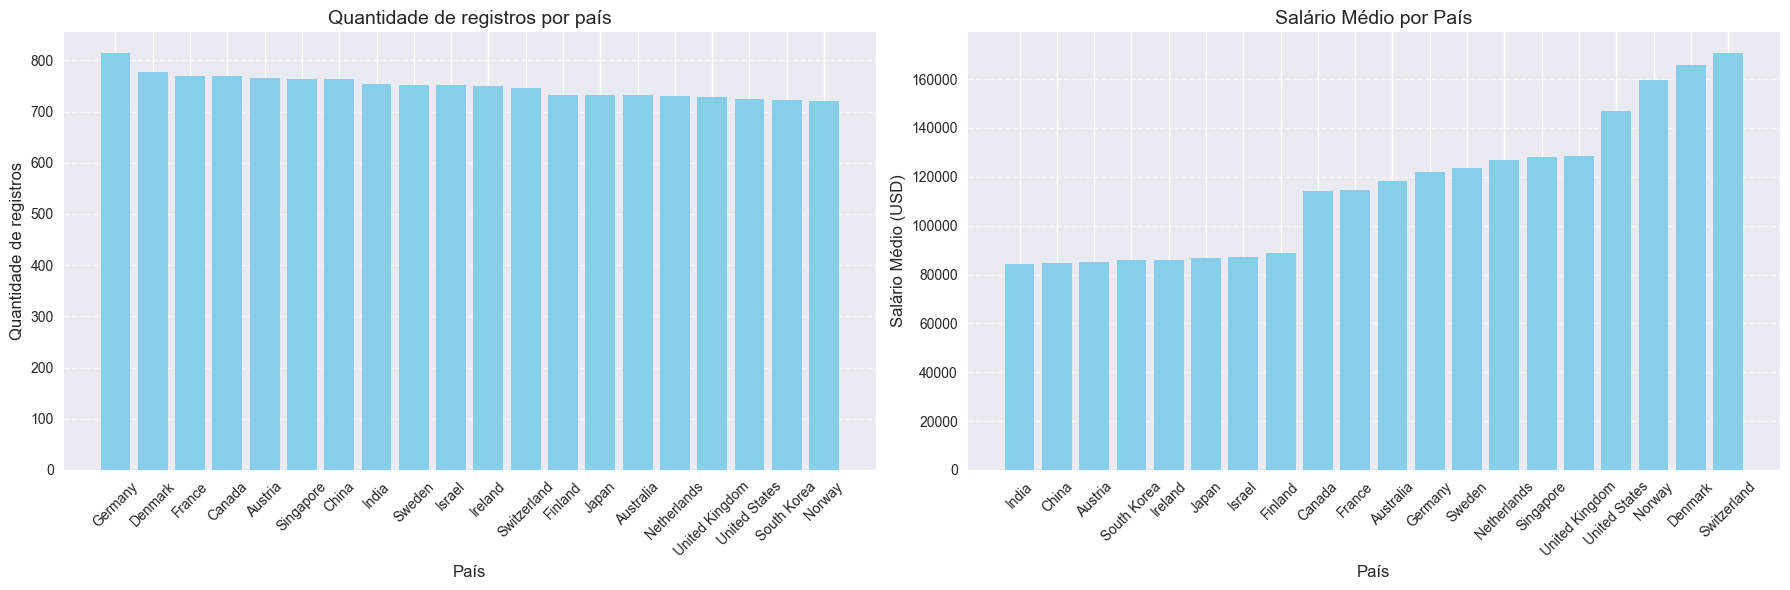

In [191]:
# --- Gráfico 1: Quantidade de registros por país ---
dados_por_pais = df['company_location'].value_counts().sort_values(ascending=False)

# --- Gráfico 2: Salário médio por país ---
salario_medio_por_pais = df.groupby('company_location')['salary_usd'].mean().sort_values()

# Criando subplots lado a lado
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Gráfico 1
axs[0].bar(dados_por_pais.index, dados_por_pais.values, color='skyblue')
axs[0].set_title('Quantidade de registros por país', fontsize=14)
axs[0].set_xlabel('País', fontsize=12)
axs[0].set_ylabel('Quantidade de registros', fontsize=12)
axs[0].tick_params(axis='x', rotation=45)
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico 2
axs[1].bar(salario_medio_por_pais.index, salario_medio_por_pais.values, color='skyblue')
axs[1].set_title('Salário Médio por País', fontsize=14)
axs[1].set_xlabel('País', fontsize=12)
axs[1].set_ylabel('Salário Médio (USD)', fontsize=12)
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

##### Conclusão dos Gráficos: Quantidade de Registros por País e Salário Médio por País

A **HIPÓTESE 1 DO MVP FOI CONFIRMADA**. O gráfico de barras Quantidade de registros por país, construído a partir da coluna `company_location` (localização da empresa), mostra que a distribuição da quantidade de dados entre os 20 países é relativamente equilibrada, sem grandes variações ou disparidades significativas. Essa uniformidade é adequada para uma análise acadêmica confiável, evitando viés de confirmação e garantindo uma base sólida para comparações entre países.

Já o gráfico de barras Salário Médio por País, gerado a partir da média da coluna `salary_usd` (salário em dólares) agrupada pela `company_location` (localização da empresa), revela que existem diferenças salariais relevantes entre os países. A Suíça apresenta a maior média salarial, enquanto a Índia possui a menor. Esses dados confirmam a hipótese de que a localização geográfica da empresa influencia diretamente na remuneração dos profissionais da área de Inteligência Artificial.

---
<a href="#22">Início - MVP Engenharia de Dados</a>

<a href="#33">Fim - MVP Meachine Learning</a>

#### <a id="31.3.2">Gráficos: Modalidade de Trabalho e Salário Médio</a>

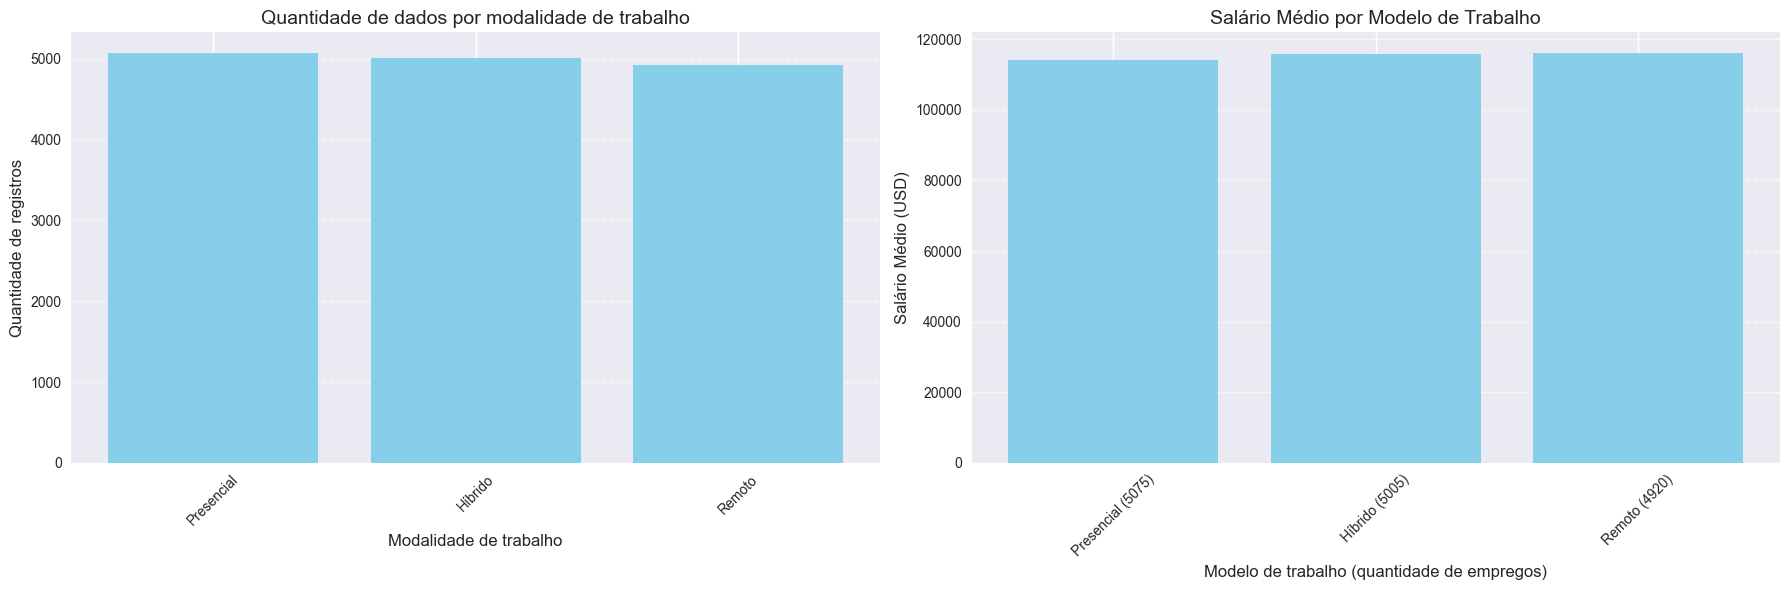

In [192]:
# --- Dados para o Gráfico 1: Quantidade por modalidade de trabalho ---
dados_por_modelo_de_trabalho = df['remote_ratio'].value_counts().sort_values(ascending=False)

rotulos = {
    0: "Presencial",
    50: "Híbrido",
    100: "Remoto"
}

rotulos_barras_1 = [rotulos[key] for key in dados_por_modelo_de_trabalho.index]

# --- Dados para o Gráfico 2: Salário médio por modelo de trabalho ---
salario_medio_trabalho_remoto = df.groupby('remote_ratio')['salary_usd'].mean().sort_index()
quantidade_trabalho_remoto = df['remote_ratio'].value_counts().sort_index()

rotulos_barras_2 = [
    f"{rotulos[key]} ({quantidade_trabalho_remoto[key]})"
    for key in sorted(rotulos.keys())
]

# Criando subplots lado a lado
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Gráfico 1: Quantidade por modalidade
axs[0].bar(rotulos_barras_1, dados_por_modelo_de_trabalho.values, color='skyblue')
axs[0].set_title('Quantidade de dados por modalidade de trabalho', fontsize=14)
axs[0].set_xlabel('Modalidade de trabalho', fontsize=12)
axs[0].set_ylabel('Quantidade de registros', fontsize=12)
axs[0].tick_params(axis='x', rotation=45)
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico 2: Salário médio por modalidade
axs[1].bar(rotulos_barras_2, salario_medio_trabalho_remoto.values, color='skyblue')
axs[1].set_title('Salário Médio por Modelo de Trabalho', fontsize=14)
axs[1].set_xlabel('Modelo de trabalho (quantidade de empregos)', fontsize=12)
axs[1].set_ylabel('Salário Médio (USD)', fontsize=12)
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

##### Conclusão dos Gráficos: Modalidade de Trabalho e Salário Médio

A **HIPÓTESE 2 DO MVP FOI NEGADA**. O gráfico de barras Quantidade de dados por modalidade de trabalho, construído com base na coluna `remote_ratio` (modelo de trabalho - presencial, híbrido ou remoto), mostra que há uma distribuição equilibrada de registros entre os três modelos de trabalho — presencial, híbrido e remoto. Essa uniformidade é adequada para uma análise acadêmica confiável, sem viés de confirmação, garantindo comparações justas entre os diferentes regimes de atuação.

Já o gráfico Salário Médio por modelo de trabalho, obtido a partir da média da coluna `salary_usd` (salário em dólares) agrupada por `remote_ratio` (modelo de trabalho - presencial, híbrido ou remoto), revela que não há diferenças significativas entre as médias salariais, mesmo após normalização para dólares americanos. A variação observada é mínima, o que contraria a hipótese de que existem disparidades salariais relevantes entre os regimes remoto, híbrido e presencial.

---
<a href="#22">Início - MVP Engenharia de Dados</a>

<a href="#33">Fim - MVP Meachine Learning</a>

#### <a id="31.3.3">Gráficos: Nível de Experiência e Anos de Experiência</a>

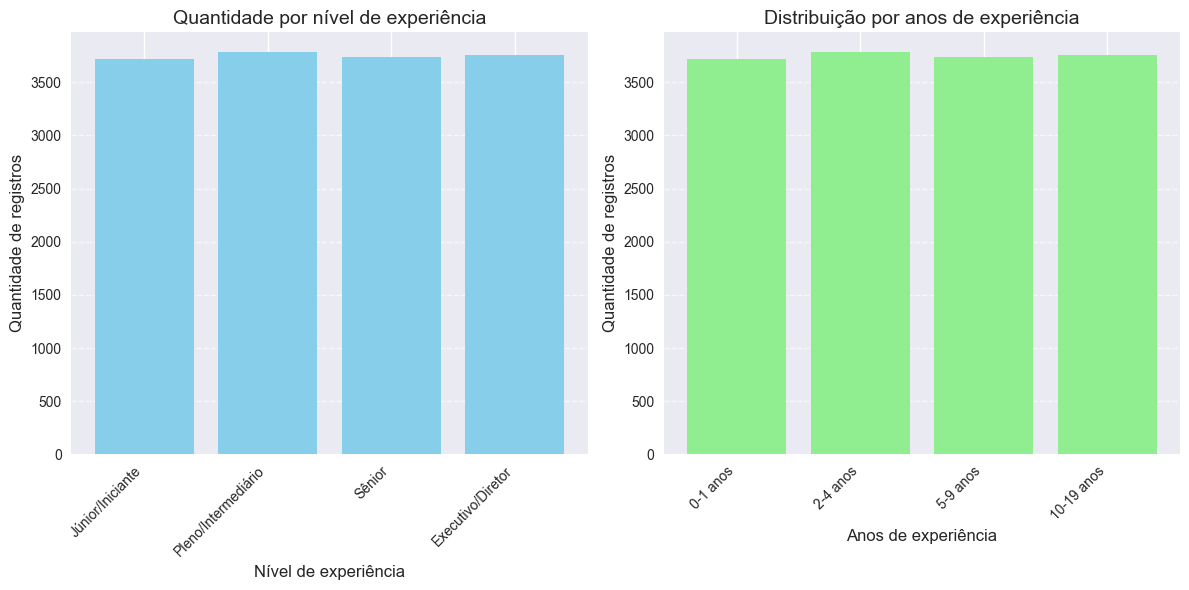

Anos de experiência por nível:
                     Mínimo  Máximo
experience_level                   
Júnior/Iniciante          0       1
Pleno/Intermediário       2       4
Sênior                    5       9
Executivo/Diretor        10      19


In [193]:
# Gráficos Quantidade por nível de experiência e Distribuição por anos de experiência:
rotulos_experiencia = {
    'EN': 'Júnior/Iniciante',
    'MI': 'Pleno/Intermediário',
    'SE': 'Sênior',
    'EX': 'Executivo/Diretor'
}

# Ordem desejada
ordem_experiencia = ['EN', 'MI', 'SE', 'EX']

# Contando os valores e reordenando conforme a ordem desejada
dados_por_experiencia = df['experience_level'].value_counts()
dados_ordenados = [dados_por_experiencia.get(nivel, 0) for nivel in ordem_experiencia]
rotulos_barras = [rotulos_experiencia[nivel] for nivel in ordem_experiencia]

# Distribuição de years_experience
anos_experiencia = df['years_experience'].value_counts().sort_index()

# Agrupando os anos de experiência em intervalos
anos_experiencia = [sum(anos_experiencia[0:2]), sum(anos_experiencia[2:5]), sum(anos_experiencia[5:10]), sum(anos_experiencia[10:])]

# Criando os dois gráficos lado a lado
plt.figure(figsize=(12, 6))

# Gráfico 1: Por nível de experiência
plt.subplot(1, 2, 1)
plt.bar(rotulos_barras, dados_ordenados, color='skyblue')
plt.title('Quantidade por nível de experiência', fontsize=14)
plt.xlabel('Nível de experiência', fontsize=12)
plt.ylabel('Quantidade de registros', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico 2: Por anos de experiência
plt.subplot(1, 2, 2)
plt.bar(["0-1 anos", "2-4 anos", "5-9 anos","10-19 anos"], anos_experiencia, color='lightgreen')
plt.title('Distribuição por anos de experiência', fontsize=14)
plt.xlabel('Anos de experiência', fontsize=12)
plt.ylabel('Quantidade de registros', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#Anos de experiência por nível:
# Mapeamento dos rótulos legíveis
rotulos_experiencia = {
    'EN': 'Júnior/Iniciante',
    'MI': 'Pleno/Intermediário',
    'SE': 'Sênior',
    'EX': 'Executivo/Diretor'
}

# Criando um DataFrame com as estatísticas por nível de experiência
estatisticas_experiencia = df.groupby('experience_level')['years_experience'].agg(['min', 'max'])

# Renomeando os índices para os nomes legíveis
estatisticas_experiencia.index = estatisticas_experiencia.index.map(rotulos_experiencia)

# Renomeando as colunas para português
estatisticas_experiencia = estatisticas_experiencia.rename(columns={
    'min': 'Mínimo',
    'max': 'Máximo',
})

# Ordenando conforme a ordem Júnior -> Pleno -> Sênior -> Executivo
ordem_desejada = ['Júnior/Iniciante', 'Pleno/Intermediário', 'Sênior', 'Executivo/Diretor']
estatisticas_experiencia = estatisticas_experiencia.loc[ordem_desejada]

# Mostrando o resultado
print("Anos de experiência por nível:")
print(estatisticas_experiencia)

##### Conclusão dos Gráficos: Nível de Experiência e Anos de Experiência

O gráfico **Quantidade por nível de experiência**, baseado na coluna **`experience_level` (nível de experiência)**, demonstra uma distribuição equilibrada e homogênea entre as categorias:
- Júnior
- Pleno
- Sênior
- Executivo

Já o gráfico **Distribuição por Anos de Experiência**, construído com base na coluna **`years_experience` (anos de experiência)**, confirma essa distribuição balanceada, considerando as seguintes faixas (as faixas puderam ser esclarecidas a partir da tabela apresentada como resultado ao código acima):

| Categoria              | Anos Mínimos | Anos Máximos |
|------------------------|-------------:|-------------:|
| Júnior/Iniciante       | 0            | 1            |
| Pleno/Intermediário    | 2            | 4            |
| Sênior                 | 5            | 9            |
| Executivo/Diretor      | 10           | 19           |



**Assim, ambos os gráficos apresentam uma distribuição proporcional entre as diferentes categorias de experiência profissional, própria para uma análise acadêmica e sem nenhum viés de confirmação, de modo a servir como base para os próximos gráficos deste MVP.**

---
<a href="#22">Início - MVP Engenharia de Dados</a>

<a href="#33">Fim - MVP Meachine Learning</a>

#### <a id="31.3.4">Gráfico: Salário Médio por Quantidade de Skills</a>

Nesta etapa, foi utilizada a coluna **`required_skills` (habilidades exigidas)** para criar uma **nova variável** que contabiliza o **número de habilidades técnicas exigidas** para cada vaga. Essa transformação permite analisar se existe uma **relação entre a quantidade de competências solicitadas** e a **média salarial oferecida**. O principal objetivo é verificar se **posições que demandam mais skills tendem a oferecer remunerações proporcionalmente maiores**, fornecendo assim insights relevantes sobre o impacto da complexidade técnica nas faixas salariais.

In [194]:
df["required_skills"]

0               Tableau, PyTorch, Kubernetes, Linux, NLP
1        Deep Learning, AWS, Mathematics, Python, Docker
2           Kubernetes, Deep Learning, Java, Hadoop, NLP
3                              Scala, SQL, Linux, Python
4                           MLOps, Java, Tableau, Python
                              ...                       
14995                            Java, Kubernetes, Azure
14996            Mathematics, Docker, SQL, Deep Learning
14997                                  Scala, Spark, NLP
14998          Java, Computer Vision, Python, TensorFlow
14999      Scala, Azure, Deep Learning, GCP, Mathematics
Name: required_skills, Length: 15000, dtype: object

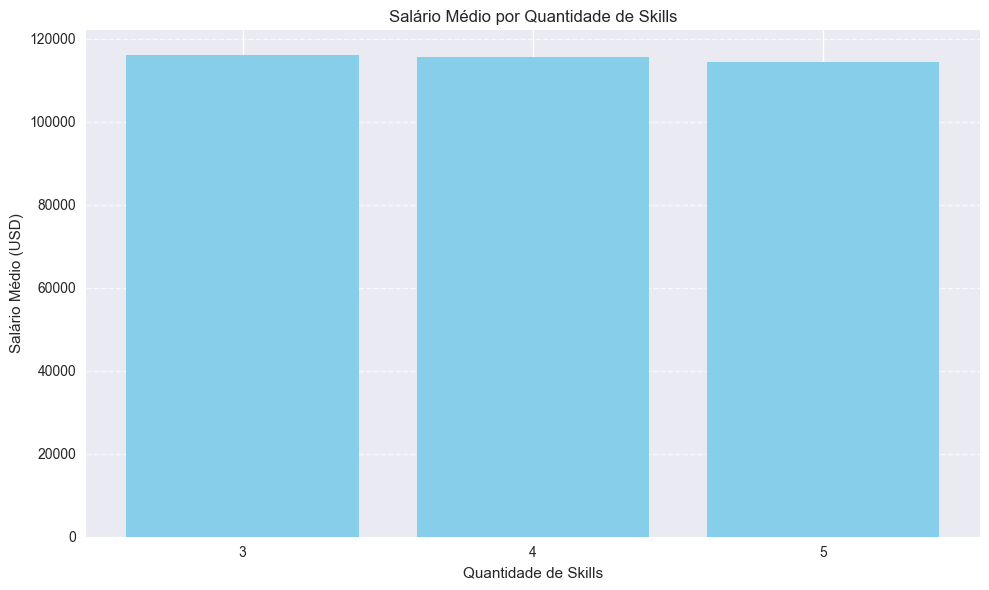

In [195]:
# Gráfico Salário Médio por Quantidade de Skills
# Cria a coluna com a quantidade de skills
df['qtd_skills'] = df['required_skills'].fillna('').apply(lambda x: len(x.split(',')) if x else 0)

# Agrupa pela quantidade de skills e calcula o salário médio
media_salarial_por_qtd_skills = df.groupby('qtd_skills')['salary_usd'].mean().reset_index()

# Criação do gráfico de barras com cor skyblue
plt.figure(figsize=(10, 6))
plt.bar(media_salarial_por_qtd_skills['qtd_skills'],
        media_salarial_por_qtd_skills['salary_usd'],
        color='skyblue')

# Títulos e rótulos
plt.xlabel('Quantidade de Skills')
plt.ylabel('Salário Médio (USD)')
plt.title('Salário Médio por Quantidade de Skills')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(media_salarial_por_qtd_skills['qtd_skills'])  # mostra todos os ticks do eixo X

# Exibição do gráfico
plt.tight_layout()
plt.show()

##### Conclusão do Gráfico: Salário Médio por Quantidade de Skills

A **HIPÓTESE 3 DO MVP FOI NEGADA**. Com base no gráfico, construído a partir das colunas `required_skills` (habilidades exigidas), `qtd_skills` (quantidade de habilidades extraída de `required_skills`) e `salary_usd` (salário em dólares), pode-se concluir que a média salarial não apresenta variações significativas conforme a quantidade de skills exigidas.

Mesmo com o aumento de 3 para 5 habilidades técnicas requisitadas, o salário médio se mantém praticamente estável, variando em torno de USD 115.000. Esse comportamento indica que, para este conjunto de dados, a exigência de mais competências técnicas não está diretamente associada a um aumento proporcional na remuneração.

---
<a href="#22">Início - MVP Engenharia de Dados</a>

<a href="#33">Fim - MVP Meachine Learning</a>

### <a id="31.4">Pair Plot (Matriz de Dispersão)</a>

O gráfico Pair Plot (ou matriz de dispersão) é uma representação visual usada para explorar relações entre múltiplas variáveis numéricas simultaneamente. Ele combina gráficos de dispersão para cada par de variáveis e distribuições univariadas na diagonal, facilitando a identificação de padrões, correlações, agrupamentos e outliers, especialmente quando segmentado por categorias.

#### <a id="31.4.1">Análise Salarial por Anos e Nível de Experiência</a>

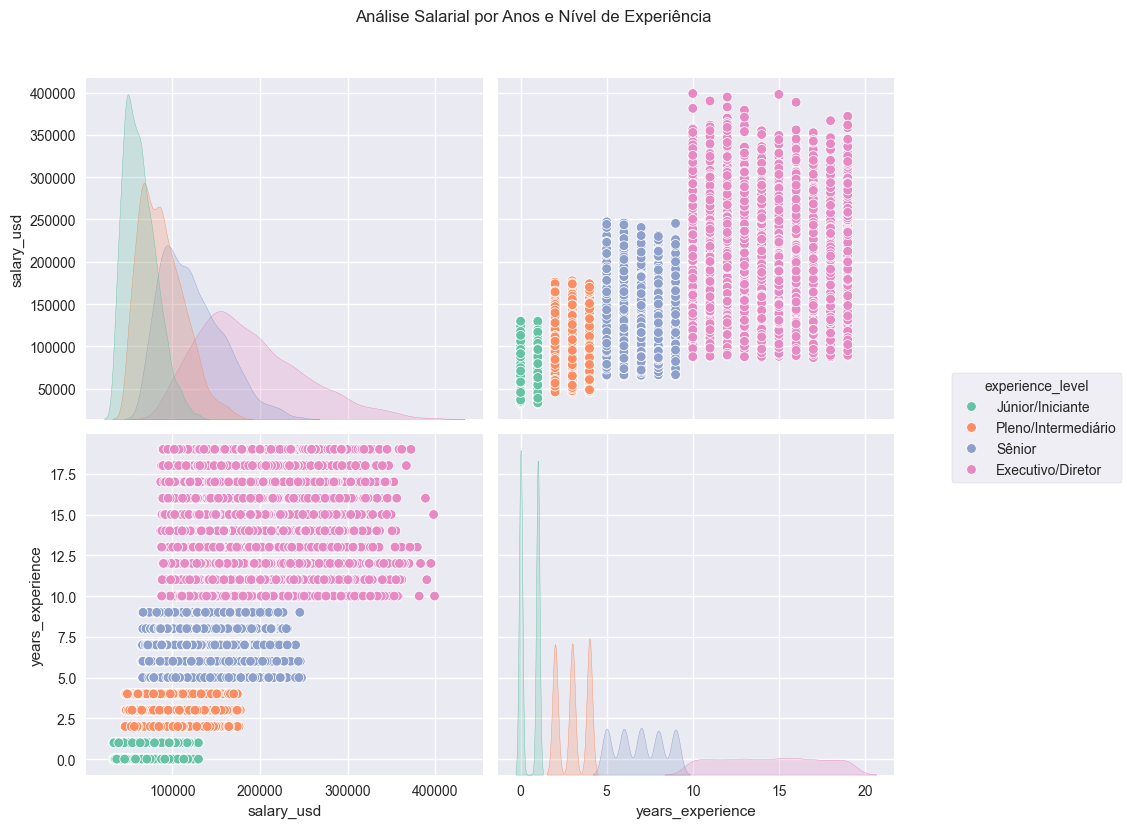

In [196]:
# Ordem desejada dos níveis de experiência
ordem_niveis = ['EN', 'MI', 'SE', 'EX']
rotulos_experiencia = {
    'EN': 'Júnior/Iniciante',
    'MI': 'Pleno/Intermediário',
    'SE': 'Sênior',
    'EX': 'Executivo/Diretor'
}

# Criação do pairplot com tamanho maior
g = sns.pairplot(
    df,
    vars=['salary_usd', 'years_experience'],
    hue='experience_level',
    palette='Set2',
    hue_order=ordem_niveis,
    height=4,
    aspect=1.2
)

# Título com mais espaço acima
g.fig.suptitle("Análise Salarial por Anos e Nível de Experiência", y=1.03)

# Ajustar os rótulos da legenda conforme dicionário
for t, l in zip(g._legend.texts, ordem_niveis):
    t.set_text(rotulos_experiencia[l])

# Mover a legenda para fora do gráfico
g._legend.set_bbox_to_anchor((1.05, 0.5))
g._legend.set_frame_on(True)

# Ajustar o layout para acomodar a legenda externa
plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()

##### Conclusão da Análise Salarial por Anos e Nível de Experiência

A **HIPÓTESE 8 DO MVP FOI CONFIRMADA**. O gráfico acima apresenta uma análise multivariada entre duas variáveis numéricas — `salary_usd` (salário em dólares) e `years_experience` (anos de experiência) — segmentadas por quatro categorias de nível de experiência profissional. Cada ponto representa um indivíduo, enquanto as distribuições nas diagonais reforçam a frequência dos dados em cada grupo. Observa-se uma relação direta entre os níveis de experiência e os valores das variáveis analisadas: quanto mais elevado o `experience_level` (nível de experiência), maior tende a ser o salário e o tempo de atuação na área.

Notadamente, profissionais do nível Executivo/Diretor (EX) concentram-se nas faixas mais altas tanto de remuneração quanto de tempo de carreira, enquanto os de nível Júnior/Iniciante (EN) ocupam as menores faixas salariais e de experiência. A separação visual clara entre os grupos reforça a ideia de progressão linear entre os níveis, confirmando que o nível de experiência influencia significativamente tanto no salário quanto no acúmulo de anos na profissão.

---
<a href="#22">Início - MVP Engenharia de Dados</a>

<a href="#33">Fim - MVP Meachine Learning</a>

### <a id="31.5">Gráfico de Pizza e Gráfico Treemap</a>

O gráfico de **pizza** é uma representação visual usada para mostrar a proporção de cada categoria em relação ao todo, dividindo um círculo em fatias. Cada fatia representa uma parte dos dados, facilitando a compreensão de participações relativas e comparações simples entre categorias. É especialmente útil para destacar percentuais e distribuição de partes dentro de um conjunto.

O gráfico de **treemap** visualiza dados hierárquicos com retângulos proporcionais, facilitando a comparação entre categorias e subcategorias.

#### <a id="31.5.1">Top 10 Skills mais Frequentes no Quartil Superior de Salários</a>

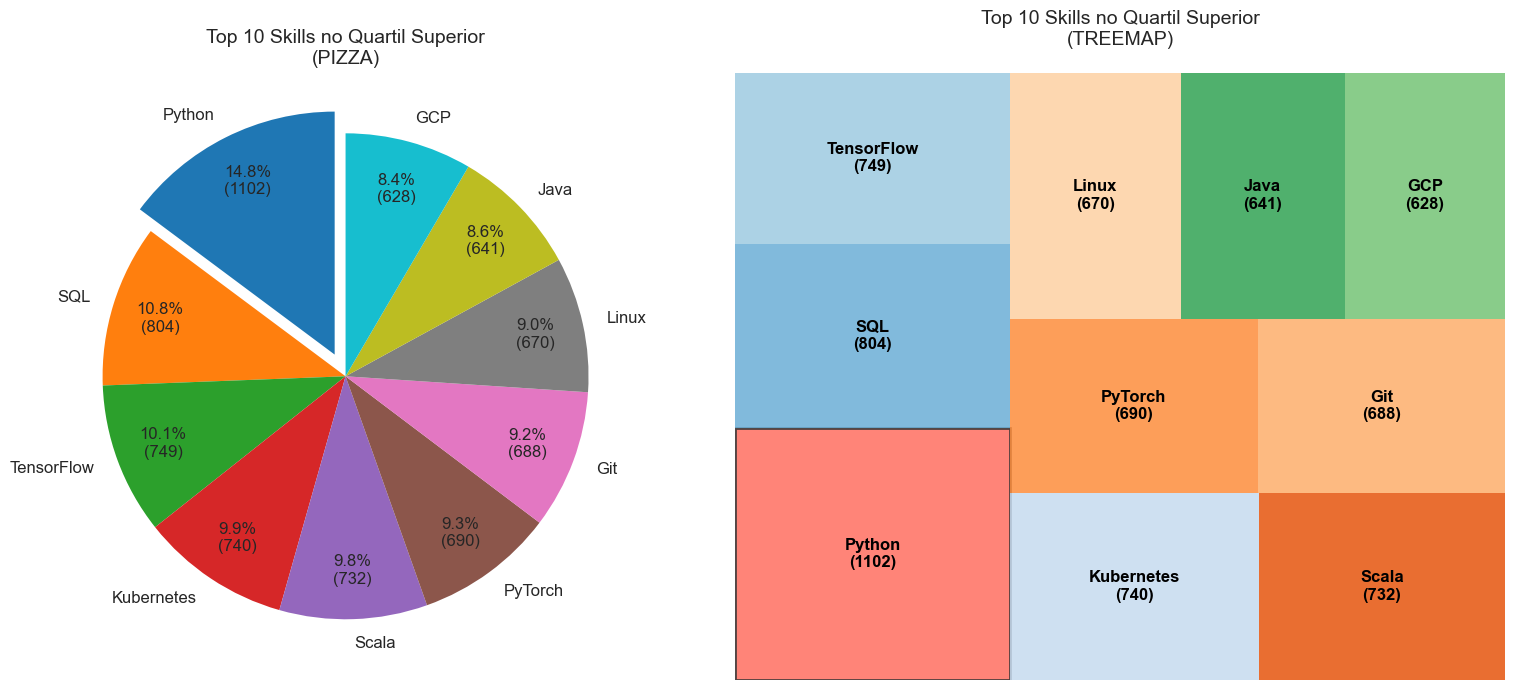

In [197]:
# --- Filtrar o quartil superior de salários ---
quartil_superior = df[df['salary_usd'] > df['salary_usd'].quantile(0.75)]

# --- Concatenar e contar as skills ---
skills_concat = quartil_superior['required_skills'].str.cat(sep=', ')
skills_lista = skills_concat.split(', ')
skills_frequencia = pd.Series(skills_lista).value_counts()
skills_mais_frequentes = skills_frequencia.sort_values(ascending=False).head(10)

# --- Dados para os gráficos ---
valores = skills_mais_frequentes.values
indices = skills_mais_frequentes.index
labels_pizza = indices
labels_treemap = [f'{skill}\n({val})' for skill, val in zip(indices, valores)]

# --- Função para formatar rótulo no gráfico de pizza ---
def formatar_label(pct, allvals):
    valor_absoluto = int(round(pct / 100. * sum(allvals)))
    return f'{pct:.1f}%\n({valor_absoluto})'

# --- Paleta de cores ---
cores_pizza = plt.cm.tab10.colors
cores_treemap = plt.cm.tab20c(range(len(valores)))
cores_treemap[0] = mcolors.to_rgba('#FF6F61', alpha=0.9)
cores_treemap = [mcolors.to_rgba(c, alpha=0.9) for c in cores_treemap]

# --- Criar figura com subplots lado a lado ---
fig, axs = plt.subplots(1, 2, figsize=(16, 7))

# --- Gráfico de Pizza ---
axs[0].pie(
    valores,
    labels=labels_pizza,
    autopct=lambda pct: formatar_label(pct, valores),
    startangle=90,
    pctdistance=0.8,
    colors=cores_pizza,
    explode=[0.1] + [0] * (len(valores) - 1),
    textprops={'fontsize': 12}
)
axs[0].set_title('Top 10 Skills no Quartil Superior\n(PIZZA)', fontsize=14)

# --- Treemap ---
squarify.plot(
    sizes=valores,
    label=labels_treemap,
    color=cores_treemap,
    alpha=0.85,
    text_kwargs={
        'fontsize': 12,
        'color': 'black',
        'fontweight': 'bold'
    },
    ax=axs[1],
    pad=False
)
axs[1].set_title('Top 10 Skills no Quartil Superior\n(TREEMAP)', fontsize=14, pad=20)
axs[1].axis('off')

# Borda para a skill mais frequente no treemap
axs[1].patches[0].set_edgecolor('#333333')
axs[1].patches[0].set_linewidth(2)

# Layout final
plt.tight_layout()
plt.show()

##### Conclusão de Top 10 Skills mais Frequentes no Quartil Superior de Salários

A **HIPÓTESE 4 DO MVP FOI CONFIRMADA**. Os gráficos PIZZA e TREEMAP, baseados nas colunas `salary_usd` (salário em dólares) e `required_skills` (habilidades exigidas), demonstram que as principais skills dos profissionais no quartil mais bem remunerado são principalmente Python, seguido de SQL e TensorFlow, confirmando a hipótese de que existem similaridades de skills entre os profissionais de IA mais bem remunerados.

---
<a href="#22">Início - MVP Engenharia de Dados</a>

<a href="#33">Fim - MVP Meachine Learning</a>

### <a id="31.6">Gráfico de Barra Horizontal de Composição Percentual</a>

Todas as barras somam 100%, e cada segmento representa a proporção de uma categoria.

#### <a id="31.6.1">Distribuição Percentual por Faixa Salarial (USD)</a>


Distribuição Percentual por Faixa Salarial (USD)
+----------------------+------------------+
| Faixa Salarial (USD) | Distribuição (%) |
+----------------------+------------------+
| $0k-$50k             | 7.6              |
| $50k-$100k           | 42.6             |
| $100k-$150k          | 26.3             |
| $150k-$200k          | 13.6             |
| $200k-$250k          | 5.9              |
| $250k-$300k          | 2.7              |
| $300k-$399k          | 1.3              |
+----------------------+------------------+


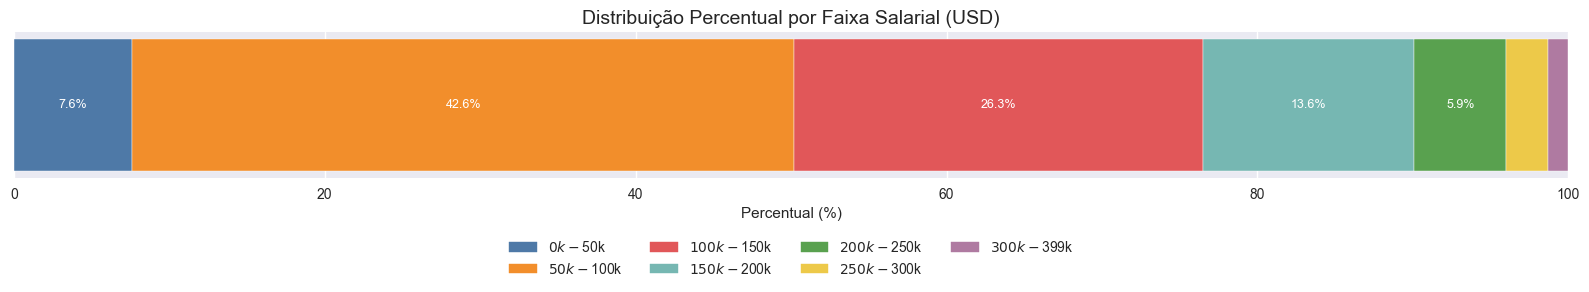

In [198]:
# Barra Horizontal de Composição Percentual e Tabela Distribuição Percentual por Faixa Salarial (USD):

# Definir as faixas de salário
faixas = [0, 50000, 100000, 150000, 200000, 250000, 300000, df['salary_usd'].max()]

# Criar categorias com essas faixas
df['faixa_salarial'] = pd.cut(df['salary_usd'], bins=faixas)

# Calcular a distribuição percentual por faixa
distribuicao_faixas = df['faixa_salarial'].value_counts(normalize=True).sort_index() * 100

# Arredondar porcentagem para 1 casa decimal
distribuicao_faixas = distribuicao_faixas.round(1)

# Criar DataFrame formatado
tabela_faixas = pd.DataFrame({
    'Faixa Salarial (USD)': [f"${int(left/1000)}k-${int(right/1000)}k"
                           if not pd.isna(right) else f">${int(left/1000)}k"
                           for left, right in zip(distribuicao_faixas.index.categories.left,
                                                  distribuicao_faixas.index.categories.right)],
    'Distribuição (%)': distribuicao_faixas.values
})

# Exibir a tabela formatada
print("\nDistribuição Percentual por Faixa Salarial (USD)")
print(tabela_faixas.to_markdown(index=False, tablefmt="pretty", stralign="left", numalign="right"))

labels = tabela_faixas['Faixa Salarial (USD)']
percentuais = tabela_faixas['Distribuição (%)']

# Lista de cores distintas (pode ser ajustada)
cores = ['#4e79a7', '#f28e2b', '#e15759', '#76b7b2', '#59a14f', '#edc949', '#af7aa1']

# Criar figura com espaço extra para a legenda
fig = plt.figure(figsize=(16, 3))
gs = fig.add_gridspec(2, 1, height_ratios=[1, 0.3])  # 2 linhas: gráfico e legenda

# Gráfico na primeira linha
ax = fig.add_subplot(gs[0])
inicio = 0

for i in range(len(percentuais)):
    ax.barh(0, percentuais[i], left=inicio, color=cores[i], edgecolor='white')
    inicio += percentuais[i]

# Adicionar rótulos sobre a barra
inicio = 0
for i in range(len(percentuais)):
    meio = inicio + percentuais[i]/2
    if percentuais[i] > 5:
        ax.text(meio, 0, f"{percentuais[i]:.1f}%", ha='center', va='center', fontsize=9, color='white')
    inicio += percentuais[i]

# Configurações do gráfico
ax.set_xlim(0, 100)
ax.set_yticks([])
ax.set_title("Distribuição Percentual por Faixa Salarial (USD)", fontsize=14)
ax.set_xlabel("Percentual (%)")

# Legenda na segunda linha
legenda_ax = fig.add_subplot(gs[1])
legenda_ax.axis('off')  # Desliga os eixos

# Criar a legenda
legenda_handles = [plt.Rectangle((0, 0), 1, 1, color=cores[i]) for i in range(len(labels))]
legenda = legenda_ax.legend(legenda_handles, labels,
                           loc='center',
                           ncol=min(4, len(labels)),  # Máximo de 4 colunas
                           frameon=False)

plt.tight_layout()
plt.show()

##### Conclusão de Distribuição Percentual por Faixa Salarial (USD)

A análise da distribuição percentual por faixa salarial mostra que o **mercado de IA se concentra majoritariamente em salários entre USD 50.000 e USD 150.000**, abrangendo quase **70% dos registros**. A faixa de **50k–100k USD** lidera com **42,6%**, seguida pela de **100k–150k USD** com **26,3%**. As faixas **extremas**, tanto as mais baixas (0k–50k) quanto as mais altas (acima de 200k), têm **baixa representatividade**.

A distribuição apresenta uma **assimetria leve**, com uma cauda estendida para salários mais altos, mas **sem concentração expressiva** nessas faixas. Isso indica uma **predominância de salários médios** no setor, com **pouca presença de valores extremos**. A **tabela** apresentada **complementa o gráfico**, oferecendo uma **comprovação numérica** das observações visuais.



---
<a href="#22">Início - MVP Engenharia de Dados</a>

<a href="#33">Fim - MVP Meachine Learning</a>

### <a id="31.7">Gráfico de Dispersão (Scatter Plot)</a>

Apesar de normalmente ser usado para representar a relação entre duas variáveis numéricas, neste caso ele está sendo aplicado para mostrar valores individuais de uma variável numérica (desvio padrão) ao longo de um eixo categórico — o que o caracteriza como uma variação de gráfico de dispersão com eixo categórico.

#### <a id="31.7.1">Desvio Padrão das Médias Salariais</a>

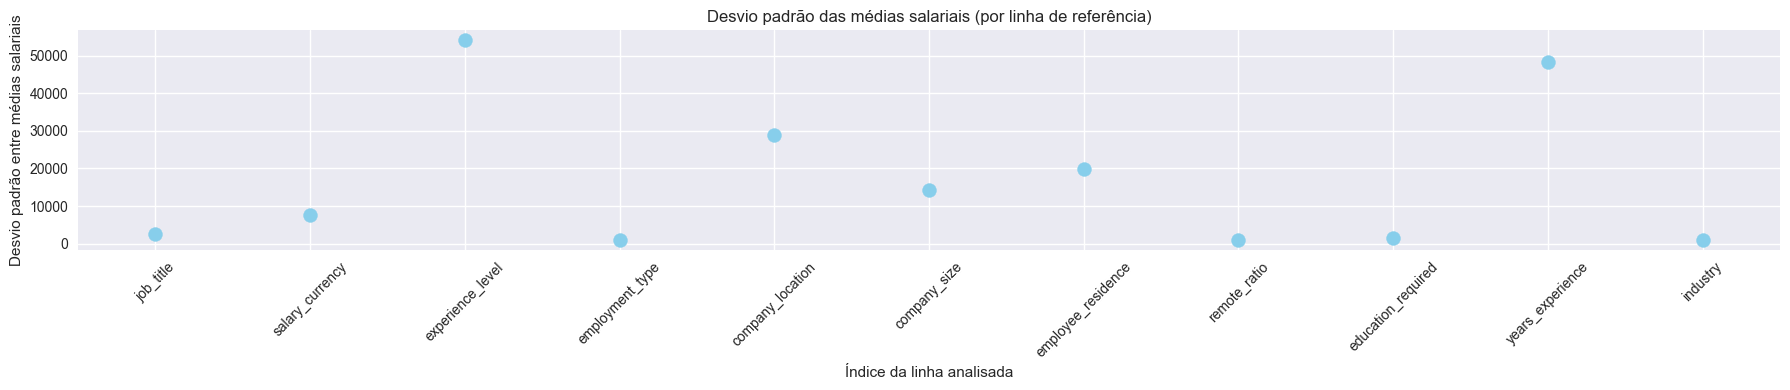

In [199]:
# Gráfico Desvio padrão das médias salariais (por linha de referência):

# Lista de parâmetros categóricos para análise
colunas_categoricas = [
    'job_title', 'salary_currency', 'experience_level',
    'employment_type', 'company_location', 'company_size',
    'employee_residence', 'remote_ratio', 'education_required',
    'years_experience', 'industry'
]

# Lista para armazenar os desvios padrão
stds = []

for idx in colunas_categoricas:
    desvio_padrao_indice = df.groupby(idx)['salary_usd'].mean().std()
    stds.append(desvio_padrao_indice)

# Plotando somente os pontos
plt.figure(figsize=(18, 4))
plt.scatter(colunas_categoricas, stds, color='skyblue', s=100)
plt.title('Desvio padrão das médias salariais (por linha de referência)')
plt.xlabel('Índice da linha analisada')
plt.ylabel('Desvio padrão entre médias salariais')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Conclusão de Desvio Padrão das Médias Salariais

O gráfico de **Desvio Padrão das Médias Salariais**, construído com base na coluna **`salary_usd` (salário em dólares)**, apresenta no eixo **y** a média salarial e no eixo **x** os diferentes **fatores categóricos** do DataFrame. Isso permite observar a **variação salarial média** associada a cada uma das seguintes colunas:

- `job_title`  
- `salary_currency`  
- `experience_level`  
- `employment_type`  
- `company_location`  
- `company_size`  
- `employee_residence`  
- `remote_ratio`  
- `education_required`  
- `years_experience`  
- `industry`  

O gráfico destaca que os **três maiores desvios padrão** das médias salariais ocorrem nas colunas **`experience_level` (nível de experiência)**, **`years_experience` (anos de experiência)** e **`company_location` (localização da empresa)**, respectivamente. Por outro lado, um dos **menores desvios padrão** aparece na coluna **`remote_ratio` (modelo de trabalho: presencial, híbrido ou remoto)**. Todos esses quatro fatores já foram analisados anteriormente neste MVP por meio de gráficos específicos, acompanhados de suas **respectivas conclusões**.

---
<a href="#22">Início - MVP Engenharia de Dados</a>

<a href="#33">Fim - MVP Meachine Learning</a>

### <a id="31.8">Histograma</a>

A distribuição de dados descreve como os valores de uma variável se espalham, ou seja, a frequência com que diferentes valores ocorrem. Entender a distribuição é crucial na análise de dados, pois revela padrões, tendências centrais, dispersão e a presença de valores atípicos (outliers). O histograma é uma ferramenta visual fundamental para representar essa distribuição, mostrando a forma dos dados, se são simétricos ou assimétricos, unimodais ou multimodais.


#### <a id="31.8.1">Distribuição de Salários por Tamanho de Empresa</a>

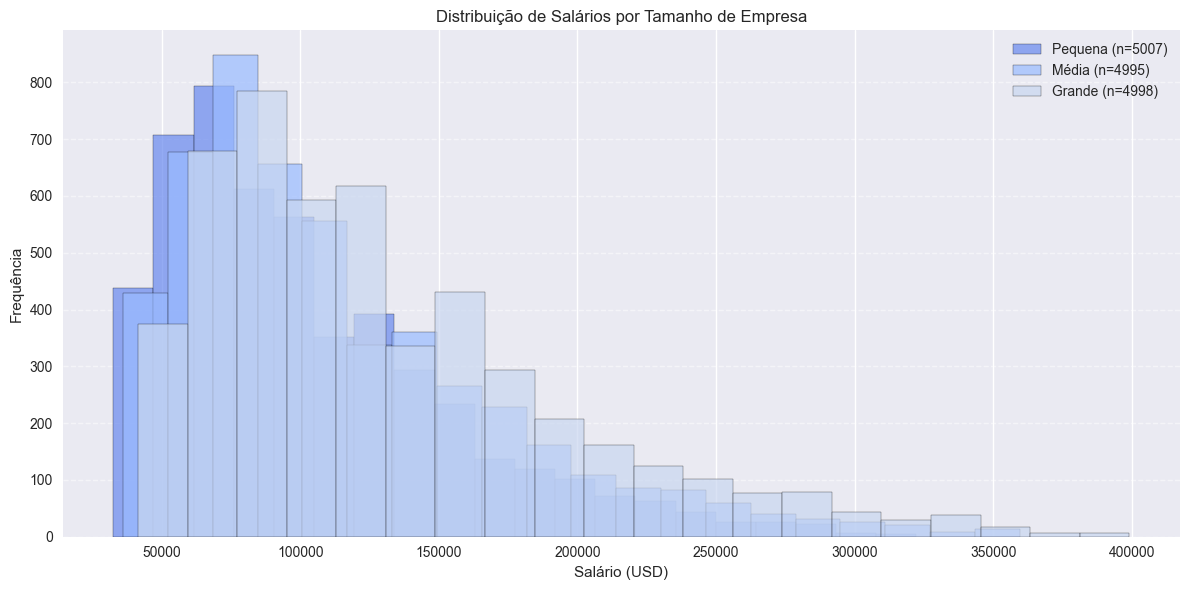

In [200]:
# Histograma de Distribuição de Salários por Tamanho de Empresa
# Ordem desejada dos tamanhos de empresa
ordem_niveis = ['S', 'M', 'L']
rotulos_experiencia = {
    'S': 'Pequena',
    'M': 'Média',
    'L': 'Grande',
}

# Configurações do histograma
bins = 20
alpha = 0.7

# Criando a figura
plt.figure(figsize=(12, 6))

# Loop para cada tamanho de empresa
for nivel in ordem_niveis:
    # Filtrando os salários para o tamanho atual
    salarios = df[df['company_size'] == nivel]['salary_usd']

    # Plotando o histograma
    plt.hist(
        salarios,
        bins=bins,
        alpha=alpha,
        label=f"{rotulos_experiencia[nivel]} (n={len(salarios)})",
        edgecolor='black'
    )

# Adicionando detalhes estéticos
plt.xlabel('Salário (USD)')
plt.ylabel('Frequência')
plt.title('Distribuição de Salários por Tamanho de Empresa')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

##### Conclusão de Distribuição de Salários por Tamanho de Empresa

A **HIPÓTESE 5 DO MVP FOI CONFIRMADA**. O histograma, construído com base nas colunas `company_size` (tamanho da empresa) e `salary_usd` (salário em dólares), revela que, independente do porte, a maioria das empresas — sejam pequenas, médias ou grandes — concentra seus salários na faixa entre **USD 50.000 e USD 150.000**, refletindo a predominância desse intervalo no mercado. No entanto, observa-se que as **empresas de grande porte apresentam uma frequência mais elevada de salários nas faixas superiores**, indicando uma maior propensão a remunerar melhor. Ainda assim, o gráfico sugere que empresas de menor porte também podem, pontualmente, oferecer salários competitivos. Dessa forma, confirma-se que **existe correlação entre o tamanho da empresa e o salário do profissional de IA**.

---
<a href="#22">Início - MVP Engenharia de Dados</a>

<a href="#33">Fim - MVP Meachine Learning</a>

### <a id="31.9">Boxplot</a>

O boxplot é uma representação visual da distribuição de dados que destaca medidas de tendência central, dispersão e possíveis outliers. Ele mostra, de forma compacta, a mediana, os quartis (Q1 e Q3), o intervalo interquartil (IQR) e valores extremos. Essa visualização é especialmente útil para comparar distribuições entre diferentes grupos, identificar assimetrias e detectar valores fora do padrão, facilitando análises rápidas e eficazes em conjuntos de dados variados.

#### <a id="31.9.1">Distribuição de Salários por Setor</a>

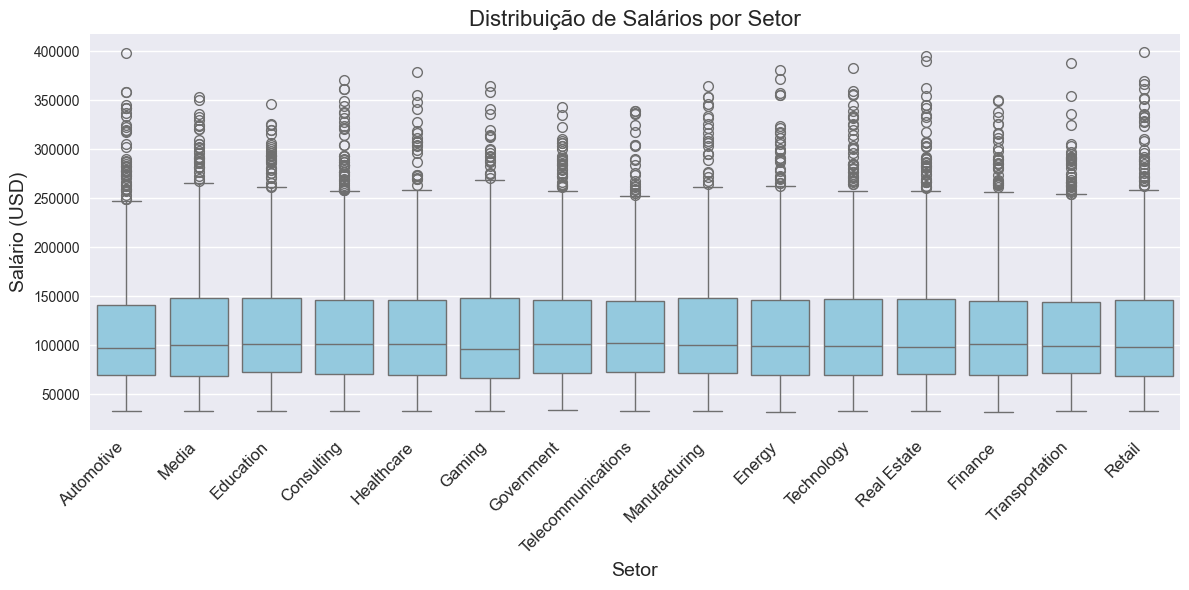


--- Tabela 1: Top 3 Setores com Maior Intervalo Interquartil (IQR) de Salário ---
industry
Gaming    81579.0
Media     79413.0
Retail    77378.0
Name: salary_usd, dtype: float64
--- Média dos IQRs: 75,954.72
--- Desvio Padrão dos IQRs: 2,638.00

--- Tabela 2: Top 3 Setores com Maior Mediana Salarial ---
industry
Telecommunications    102408.0
Government            101914.5
Finance               101409.0
Name: salary_usd, dtype: float64
--- Média das Medianas: 99,774.50
--- Desvio Padrão das Medianas: 1,856.90

--- Tabela 3: Top 3 Setores com Maior Número de Outliers de Salário ---
industry
Consulting     48
Automotive     45
Real Estate    40
Name: salary_usd, dtype: int64
--- Média do Número de Outliers: 33.13
--- Desvio Padrão do Número de Outliers: 8.27


In [201]:
# Gráfico Boxplot de Distribuição de Salários por Setor
plt.figure(figsize=(12, 6))

# Criar boxplot
sns.boxplot(x='industry', y='salary_usd', data=df, color='skyblue')
plt.title('Distribuição de Salários por Setor', fontsize=16)
plt.xlabel('Setor', fontsize=14)
plt.ylabel('Salário (USD)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

# --- Cálculo 1: Intervalo Interquartil (IQR) por Setor ---
iqr_por_industria = df.groupby('industry')['salary_usd'].apply(
    lambda x: x.quantile(0.75) - x.quantile(0.25)
).sort_values(ascending=False)
media_iqr_ind = iqr_por_industria.mean()
desvio_iqr_ind = iqr_por_industria.std()

# --- Cálculo 2: Mediana de Salários por Setor ---
medianas_por_industria = df.groupby('industry')['salary_usd'].median().sort_values(ascending=False)
media_medianas_ind = medianas_por_industria.mean()
desvio_medianas_ind = medianas_por_industria.std()

# --- Cálculo 3: Outliers por Setor ---
outliers_por_industria = df.groupby('industry')['salary_usd'].apply(
    lambda x: x[(x > x.quantile(0.75) + 1.5 * (x.quantile(0.75) - x.quantile(0.25))) |
                (x < x.quantile(0.25) - 1.5 * (x.quantile(0.75) - x.quantile(0.25)))].count()
).sort_values(ascending=False)
media_outliers_ind = outliers_por_industria.mean()
desvio_outliers_ind = outliers_por_industria.std()

# --- Exibição dos resultados ---
print("\n--- Tabela 1: Top 3 Setores com Maior Intervalo Interquartil (IQR) de Salário ---")
print(iqr_por_industria.head(3))
print(f"--- Média dos IQRs: {media_iqr_ind:,.2f}")
print(f"--- Desvio Padrão dos IQRs: {desvio_iqr_ind:,.2f}")

print("\n--- Tabela 2: Top 3 Setores com Maior Mediana Salarial ---")
print(medianas_por_industria.head(3))
print(f"--- Média das Medianas: {media_medianas_ind:,.2f}")
print(f"--- Desvio Padrão das Medianas: {desvio_medianas_ind:,.2f}")

print("\n--- Tabela 3: Top 3 Setores com Maior Número de Outliers de Salário ---")
print(outliers_por_industria.head(3))
print(f"--- Média do Número de Outliers: {media_outliers_ind:,.2f}")
print(f"--- Desvio Padrão do Número de Outliers: {desvio_outliers_ind:,.2f}")

##### Conclusão de Distribuição de Salários por Setor

A **HIPÓTESE 6 DO MVP FOI NEGADA**. A análise da variabilidade salarial entre os diferentes setores da área de Inteligência Artificial, baseada na coluna `industry` (setor) e utilizando os valores salariais da coluna `salary_usd` (salário em dólares), revela que os Top 3 setores com maior Intervalo Interquartil (IQR) e maior mediana salarial apresentam valores ligeiramente acima da média, mas ainda dentro de até 2 desvios padrão. Isso indica variações salariais esperadas e compatíveis com a distribuição geral dos dados.

No caso da quantidade de outliers salariais, os setores de Consultoria, Automotivo e Imobiliário se destacam com números significativamente acima da média, especialmente o setor de Consultoria, com 48 outliers — valor próximo a 2 desvios padrão acima da média, sugerindo uma maior concentração de salários extremos nesse setor.

Apesar dessas variações, a distribuição salarial entre os setores analisados não apresenta distorções graves, indicando uma estrutura salarial relativamente equilibrada, confirmando que os profissionais de diferentes ramificações da IA não têm remunerações significativamente diferentes.

---
<a href="#22">Início - MVP Engenharia de Dados</a>

<a href="#33">Fim - MVP Meachine Learning</a>

#### <a id="31.9.2">Distribuição de Salários por Job Title (Área de Atuação)</a>

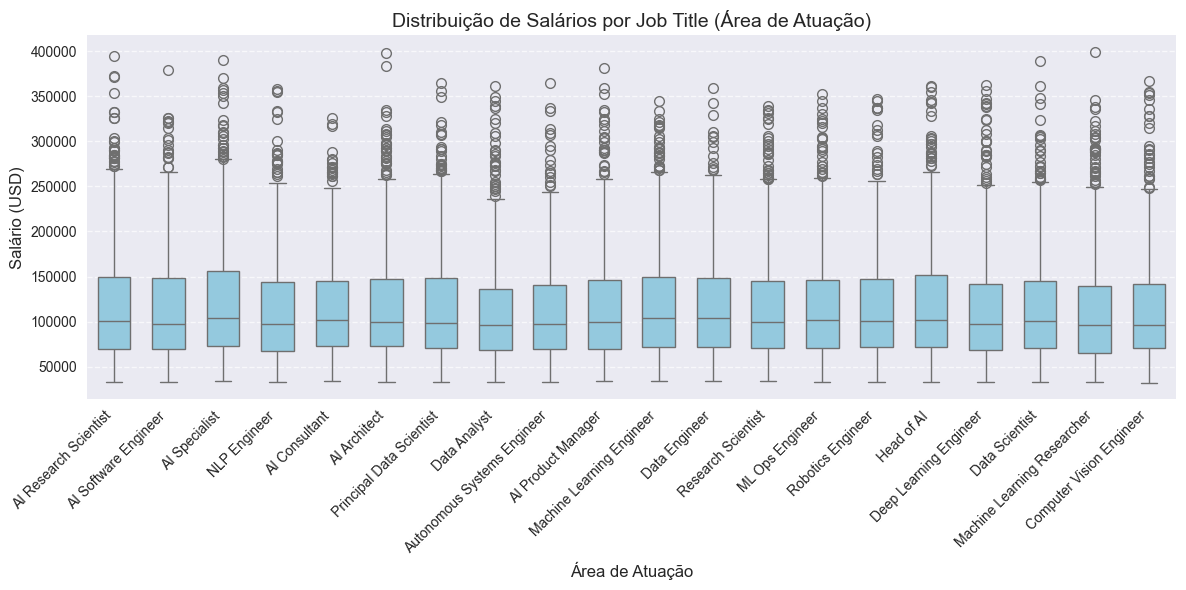


--- Tabela 1: Top 3 Ramos com Maior Intervalo Interquartil (IQR) de Salário ---
job_title
AI Specialist            82793.25
AI Research Scientist    80048.25
Head of AI               79701.00
Name: salary_usd, dtype: float64
--- Média dos IQRs: 75,605.07
--- Desvio Padrão dos IQRs: 3,748.75

--- Tabela 2: Top 3 Ramos com Maior Mediana Salarial ---
job_title
Data Engineer                104447.0
Machine Learning Engineer    103687.0
AI Specialist                103626.5
Name: salary_usd, dtype: float64
--- Média das Medianas: 99,797.30
--- Desvio Padrão das Medianas: 2,540.63

--- Tabela 3: Top 3 Ramos com Maior Número de Outliers de Salário ---
job_title
Machine Learning Researcher    35
AI Architect                   31
Research Scientist             30
Name: salary_usd, dtype: int64
--- Média do Número de Outliers: 24.55
--- Desvio Padrão do Número de Outliers: 5.41


In [202]:
# Gráfico Boxplot de Distribuição de Salários por Ramo da IA
plt.figure(figsize=(12, 6))

# Criando o boxplot
sns.boxplot(
    data=df,
    x="job_title",
    y="salary_usd",
    color="skyblue",
    width=0.6
)

# Ajustes estéticos
plt.title("Distribuição de Salários por Job Title (Área de Atuação)", fontsize=14)
plt.xlabel("Área de Atuação", fontsize=12)
plt.ylabel("Salário (USD)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# --- Cálculo 1: Intervalo Interquartil (IQR) por Ramo da IA (job_title) ---
iqr_por_ramo = df.groupby('job_title')['salary_usd'].apply(
    lambda x: x.quantile(0.75) - x.quantile(0.25)
).sort_values(ascending=False)
media_iqr = iqr_por_ramo.mean()
desvio_iqr = iqr_por_ramo.std()

# --- Cálculo 2: Mediana de Salários por Ramo da IA (job_title) ---
mediana_por_ramo = df.groupby('job_title')['salary_usd'].median().sort_values(ascending=False)
media_medianas = mediana_por_ramo.mean()
desvio_medianas = mediana_por_ramo.std()

# --- Cálculo 3: Outliers por Ramo da IA (job_title) ---
outliers_por_ramo = df.groupby('job_title')['salary_usd'].apply(
    lambda x: x[(x > x.quantile(0.75) + 1.5 * (x.quantile(0.75) - x.quantile(0.25))) |
                (x < x.quantile(0.25) - 1.5 * (x.quantile(0.75) - x.quantile(0.25)))].count()
).sort_values(ascending=False)
media_outliers = outliers_por_ramo.mean()
desvio_outliers = outliers_por_ramo.std()

# --- Exibição dos resultados ---
print("\n--- Tabela 1: Top 3 Ramos com Maior Intervalo Interquartil (IQR) de Salário ---")
print(iqr_por_ramo.head(3))
print(f"--- Média dos IQRs: {media_iqr:,.2f}")
print(f"--- Desvio Padrão dos IQRs: {desvio_iqr:,.2f}")

print("\n--- Tabela 2: Top 3 Ramos com Maior Mediana Salarial ---")
print(mediana_por_ramo.head(3))
print(f"--- Média das Medianas: {media_medianas:,.2f}")
print(f"--- Desvio Padrão das Medianas: {desvio_medianas:,.2f}")

print("\n--- Tabela 3: Top 3 Ramos com Maior Número de Outliers de Salário ---")
print(outliers_por_ramo.head(3))
print(f"--- Média do Número de Outliers: {media_outliers:,.2f}")
print(f"--- Desvio Padrão do Número de Outliers: {desvio_outliers:,.2f}")

##### Conclusão de Distribuição de Salários por Job Title (Área de Atuação)

A **HIPÓTESE 7 DO MVP FOI NEGADA**. A análise da variabilidade salarial nos diferentes ramos da Inteligência Artificial, com base na coluna `job_title` (área de atuação) e utilizando os valores da coluna `salary_usd` (salário em dólares), mostra que os Top 3 cargos com maior IQR e mediana salarial apresentam valores ligeiramente acima da média, porém dentro de um intervalo de até 2 desvios padrão, indicando variações esperadas e consistentes com o conjunto de dados.

Já no caso do número de outliers, os Top 3 cargos apresentam valores acima da média e mais distantes, especialmente o cargo de Machine Learning Researcher, com 35 outliers, que se aproxima de 2 desvios padrão acima da média, sugerindo uma maior concentração de salários extremos nesse caso específico.

Por fim, apesar de existirem ramos com maior número de outliers, é possível perceber uma distribuição salarial relativamente homogênea entre os cargos analisados, sem evidências de distorções severas, confirmando que o setor ou área de atuação da empresa não altera significativamente o salário do profissional de IA.

---
<a href="#22">Início - MVP Engenharia de Dados</a>

<a href="#33">Fim - MVP Meachine Learning</a>

#### <a id="31.9.3">Distribuição de Salários por Nível de Experiência</a>

C:\Users\Daniel\AppData\Local\Temp\ipykernel_26056\1819457572.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([rotulos_experiencia[n] for n in ordem_niveis], rotation=45, ha='right', fontsize=12)


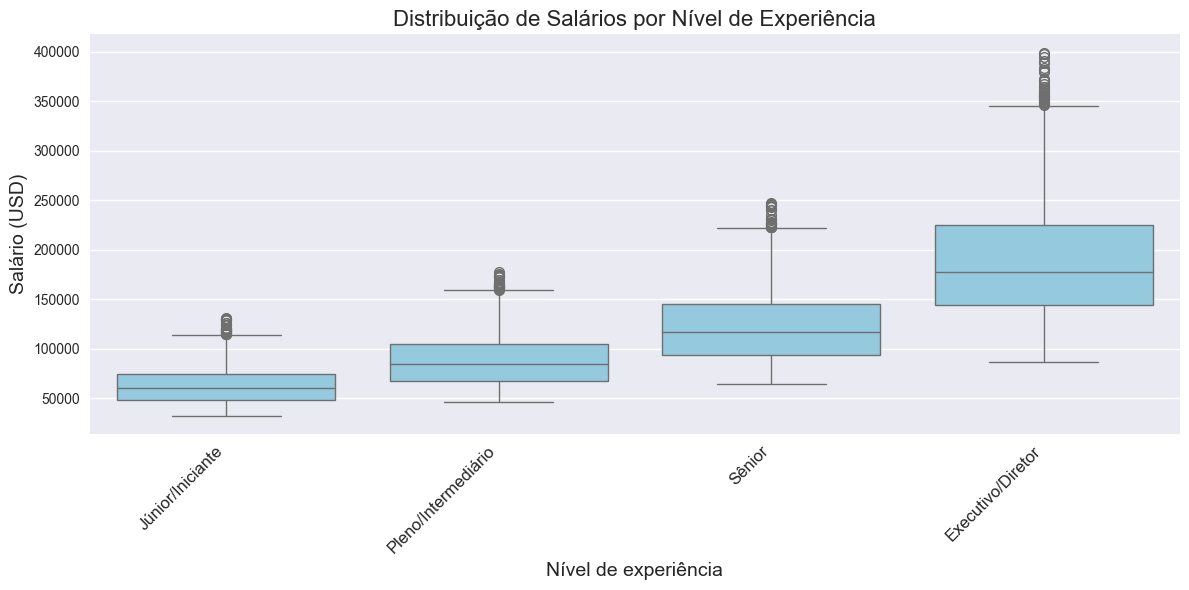


--- Tabela 1: Intervalo Interquartil (IQR) de Salário por Nível de Experiência ---
experience_level
Júnior/Iniciante       26350.5
Pleno/Intermediário    36862.0
Sênior                 51142.0
Executivo/Diretor      80583.5
--- Média dos IQRs: 48,734.50
--- Desvio Padrão dos IQRs: 23,538.30

--- Tabela 2: Mediana Salarial por Nível de Experiência ---
experience_level
Júnior/Iniciante        60373.5
Pleno/Intermediário     84641.0
Sênior                 116907.0
Executivo/Diretor      177512.0
--- Média das Medianas: 109,858.38
--- Desvio Padrão das Medianas: 50,699.65

--- Tabela 3: Número de Outliers de Salário por Nível de Experiência ---
experience_level
Júnior/Iniciante       38
Pleno/Intermediário    39
Sênior                 31
Executivo/Diretor      42
--- Média do Número de Outliers: 37.50
--- Desvio Padrão do Número de Outliers: 4.65


In [203]:
# Gráfico Boxplot de Distribuição de Salários por Nível de Experiência
# Ordem desejada dos níveis de experiência
ordem_niveis = ['EN', 'MI', 'SE', 'EX']
rotulos_experiencia = {
    'EN': 'Júnior/Iniciante',
    'MI': 'Pleno/Intermediário',
    'SE': 'Sênior',
    'EX': 'Executivo/Diretor'
}

plt.figure(figsize=(12, 6))

# Criar boxplot com ordem correta dos níveis
ax = sns.boxplot(x='experience_level', y='salary_usd', data=df, color='skyblue', order=ordem_niveis)
plt.title('Distribuição de Salários por Nível de Experiência', fontsize=16)
plt.xlabel('Nível de experiência', fontsize=14)
plt.ylabel('Salário (USD)', fontsize=14)
# Atualizar os rótulos do eixo x para os nomes legíveis
ax.set_xticklabels([rotulos_experiencia[n] for n in ordem_niveis], rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

# --- Cálculo 1: Intervalo Interquartil (IQR) por Nível de Experiência ---
iqr_por_experiencia = df.groupby('experience_level')['salary_usd'].apply(
    lambda x: x.quantile(0.75) - x.quantile(0.25)
).reindex(['EN', 'MI', 'SE', 'EX'])
media_iqr_exp = iqr_por_experiencia.mean()
desvio_iqr_exp = iqr_por_experiencia.std()

# --- Cálculo 2: Mediana de Salários por Nível de Experiência ---
mediana_por_experiencia = df.groupby('experience_level')['salary_usd'].median().reindex(['EN', 'MI', 'SE', 'EX'])
media_medianas_exp = mediana_por_experiencia.mean()
desvio_medianas_exp = mediana_por_experiencia.std()

# --- Cálculo 3: Outliers por Nível de Experiência ---
outliers_por_experiencia = df.groupby('experience_level')['salary_usd'].apply(
    lambda x: x[(x > x.quantile(0.75) + 1.5 * (x.quantile(0.75) - x.quantile(0.25))) |
                (x < x.quantile(0.25) - 1.5 * (x.quantile(0.75) - x.quantile(0.25)))].count()
).reindex(['EN', 'MI', 'SE', 'EX'])
media_outliers_exp = outliers_por_experiencia.mean()
desvio_outliers_exp = outliers_por_experiencia.std()

# --- Rótulos legíveis ---
rotulos_experiencia = {
    'EN': 'Júnior/Iniciante',
    'MI': 'Pleno/Intermediário',
    'SE': 'Sênior',
    'EX': 'Executivo/Diretor'
}

# --- Exibição dos resultados completos ---
print("\n--- Tabela 1: Intervalo Interquartil (IQR) de Salário por Nível de Experiência ---")
print(iqr_por_experiencia.rename(index=rotulos_experiencia).to_string())
print(f"--- Média dos IQRs: {media_iqr_exp:,.2f}")
print(f"--- Desvio Padrão dos IQRs: {desvio_iqr_exp:,.2f}")

print("\n--- Tabela 2: Mediana Salarial por Nível de Experiência ---")
print(mediana_por_experiencia.rename(index=rotulos_experiencia).to_string())
print(f"--- Média das Medianas: {media_medianas_exp:,.2f}")
print(f"--- Desvio Padrão das Medianas: {desvio_medianas_exp:,.2f}")

print("\n--- Tabela 3: Número de Outliers de Salário por Nível de Experiência ---")
print(outliers_por_experiencia.rename(index=rotulos_experiencia).to_string())
print(f"--- Média do Número de Outliers: {media_outliers_exp:,.2f}")
print(f"--- Desvio Padrão do Número de Outliers: {desvio_outliers_exp:,.2f}")

##### Conclusão de Distribuição de Salários por Nível de Experiência

A **HIPÓTESE 8 DO MVP FOI CONFIRMADA**. A análise da distribuição salarial por nível de experiência, com base na coluna `experience_level` (nível de experiência) e nos valores salariais da coluna `salary_usd` (salário em dólares), evidencia um crescimento progressivo tanto no Intervalo Interquartil (IQR) quanto na mediana salarial à medida que se avança na carreira. O grupo de Executivos/Diretores apresenta o maior IQR (80.583,5) e a maior mediana salarial (177.512,0), valores acima da média e superiores a 1 desvio padrão, sugerindo uma faixa salarial ampla e remuneração central elevada para os profissionais mais experientes.

Por outro lado, os profissionais Júnior/Iniciante têm o menor IQR (26.350,5) e a menor mediana salarial (60.373,5), indicando maior uniformidade e menor remuneração entre os profissionais no início da carreira.

Quanto ao número de outliers salariais, os valores são relativamente próximos da média (37,5), variando entre 31 e 42. No entanto, o grupo Sênior, com 31 outliers, apresenta um valor abaixo do limite inferior de 1 desvio padrão (32,85), o que sugere uma menor ocorrência de salários extremos nessa faixa. Os demais níveis estão dentro do intervalo esperado.

Em resumo, os dados apontam para uma estrutura salarial escalonada conforme o avanço na experiência, com incremento esperado de variabilidade e remuneração, e uma distribuição de outliers relativamente homogênea, com exceção do grupo sênior.

---
<a href="#22">Início - MVP Engenharia de Dados</a>

<a href="#33">Fim - MVP Meachine Learning</a>

### <a id="31.10">Matriz de Correlação</a>

A **matriz de correlação** é uma ferramenta fundamental na análise exploratória de dados, pois permite visualizar de forma clara o **grau de relacionamento linear entre variáveis numéricas**, por meio de coeficientes e cores. Cada célula da matriz indica a **força e a direção da correlação** entre dois atributos: valores próximos de **1** indicam **forte correlação positiva**, próximos de **-1** apontam **forte correlação negativa**, e valores próximos de **0** sugerem **ausência de correlação linear**. Essa análise é especialmente útil para identificar padrões, redundâncias ou possíveis variáveis relevantes na construção de modelos preditivos.

#### <a id="31.10.1">Matriz de Correlação das Características Numéricas</a>

In [204]:
# Matriz de correlação
print("\nMatriz de Correlação:")
df.select_dtypes(include=[np.number]).corr()


Matriz de Correlação:


,salary_usd,remote_ratio,years_experience,job_description_length,benefits_score,qtd_skills
salary_usd,1.000000,0.013727,0.737556,-0.009092,0.000985,-0.012879
remote_ratio,0.013727,1.000000,0.015321,0.004475,0.003139,-0.003813
years_experience,0.737556,0.015321,1.000000,-0.007526,-0.007275,-0.010736
job_description_length,-0.009092,0.004475,-0.007526,1.000000,0.006744,0.015142
benefits_score,0.000985,0.003139,-0.007275,0.006744,1.000000,0.009062
qtd_skills,-0.012879,-0.003813,-0.010736,0.015142,0.009062,1.000000


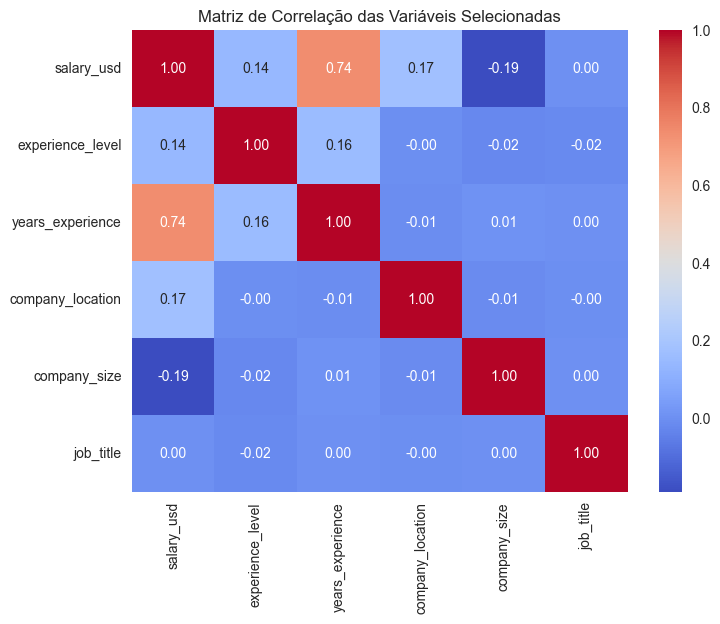

In [205]:
# Gráfico de Correlação entre Variáveis Selecionadas
# Usando as variáveis de maior desvio padrão/correlação: experience_level, years_experience, company_location, company_size, job_title

# Seleciona as colunas desejadas
cols = ['salary_usd','experience_level', 'years_experience', 'company_location', 'company_size', 'job_title']

# Cria uma cópia do DataFrame apenas com essas colunas
df_corr = df[cols].copy()

# Converte colunas categóricas para códigos numéricos usando Label Encoding
# Converte categorias em números inteiros (ex: Júnior → 0, Pleno → 1, Sênior → 2)
for col in ['experience_level', 'company_location', 'company_size', 'job_title']:
    df_corr[col] = df_corr[col].astype('category').cat.codes

plt.figure(figsize=(8, 6))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Variáveis Selecionadas')
plt.show()

##### Conclusão da Matriz de Correlação das Características Numéricas

A análise da **matriz de correlação**, construída a partir das colunas `salary_usd`, `experience_level`, `years_experience`, `company_location`, `company_size` e `job_title`, mostra que a variável com **maior associação ao `salary_usd` (salário em dólares) é `years_experience` (anos de experiência)**, com uma **correlação positiva forte** (≈ **0,74**). Esse resultado indica que **profissionais com mais tempo de atuação na área tendem a receber salários significativamente maiores**.

Em paralelo, o **`experience_level` (nível de experiência)** apresenta uma **correlação positiva mais fraca** em relação ao salário. Isso sugere que apenas a **classificação formal por nível hierárquico** não capta toda a variação salarial, sendo **menos determinante do que os anos efetivos de atuação**.

O **`company_size` (tamanho da empresa)** apresenta uma **correlação negativa leve** (≈ **-0,19**) com o salário, o que indica a possibilidade de que, **pontualmente, empresas menores podem oferecer remunerações competitivas**.

A variável **`company_location` (localização da empresa)** possui uma **correlação positiva fraca** (≈ **0,17**), revelando que a **geografia exerce impacto modesto** sobre os salários.

Por fim, variáveis como **`job_title` (área de atuação)** apresentam **correlação próxima de zero**, indicando que **não há uma relação linear significativa com o salário**.

---
<a href="#22">Início - MVP Engenharia de Dados</a>

<a href="#33">Fim - MVP Meachine Learning</a>

## <a id="32">Conclusão da Análise / Respostas das Hipóteses</a>

A análise do dataset [Global AI Job Market & Salary Trends 2025](https://www.kaggle.com/datasets/bismasajjad/global-ai-job-market-and-salary-trends-2025) permitiu responder as hipóteses iniciais.

## Hipóteses

As hipóteses levantadas no início do MVP, usando o dataset: [Global AI Job Market & Salary Trends 2025](https://www.kaggle.com/datasets/bismasajjad/global-ai-job-market-and-salary-trends-2025) foram:

1. A localização geográfica da companhia seria um fator que influencia no salário do profissional de IA?

    **Resposta 1:** A hipótese 1 foi confirmada. Sim, a localização geográfica da companhia é um fator que influencia no salário do profissional, pois como mostram os <a href="#31.3.1">Gráficos: Quantidade de Registros por País e Salário Médio por País</a>, existe diferença entre as médias salariais (normalizadas para USD) por localização geográfica da companhia (de 20 países), sendo a maior média salarial na Suíça e a menor na Índia.
2. Existe diferença no salário entre profissionais de IA que trabalham de maneira remota, híbrida ou presencial?

    **Resposta 2:** A hipótese 2 foi negada. Não, não existe diferença no salário entre profissionais que trabalham de maneira remota, híbrida ou presencial, pois como mostram os <a href="#31.3.2">Gráficos: Modalidade de Trabalho e Salário Médio</a>, não há uma diferença significativa entre as médias salariais (normalizadas para USD) por modelo de trabalho.
3. A exigência do maior número de competências técnicas (quantidade de skills) está relacionada a um aumento proporcional na remuneração?

    **Resposta 3:** A hipótese 3 foi negada. Não, a exigência de mais competências técnicas (quantidade de skills) não está diretamente associada a um aumento proporcional na remuneração, pois como o <a href="#31.3.4">Gráfico: Salário Médio por Quantidade de Skills</a>, mesmo com o aumento de 3 para 5 competências técnicas (quantidade de skills) requisitadas, o salário médio se mantém praticamente estável, variando em torno de USD 115.000.
4. Há similaridades de skills entre os profissionais de IA mais bem remunerados?

    **Resposta 4:** A hipótese 4 foi confirmada. Sim, há similaridades de skills entre os profissionais de IA mais bem remunerados, pois como mostram os dados em <a href="#31.5.1">Top 10 Skills mais Frequentes no Quartil Superior de Salários</a>, as top 10 skills são: Python, SQL, TensorFlow, Kubernetes, Scala, PyTorch, Git, Linux, Java, GCP. Por fim, pode-se afirmar que entre as skills anteriormente citadas, as principais são: Python, SQL e TensorFlow.
5. Existe alguma correlação entre o tamanho da empresa e o salário do profissional de IA?

    **Resposta 5:** A hipótese 5 foi confirmada. Sim, existe correlação entre o tamanho da empresa e o salário do profissional de IA, pois como mostram os dados em <a href="#31.8.1">Distribuição de Salários por Tamanho de Empresa</a>, as empresas de grande porte tendem a se sobressaírem com a maior quantidade de casos de altos salários.
6. O setor da empresa altera o salário do profissional de IA?

    **Resposta 6:** A hipótese 6 foi negada. Não, o setor da empresa não altera o salário do profissional de IA, pois como mostram os dados em <a href="#31.9.1">Distribuição de Salários por Setor</a>, a distribuição salarial entre as setores analisadas não apresenta distorções graves, indicando uma estrutura salarial relativamente equilibrada.   
7. Os profissionais de diferentes ramificações da IA têm remunerações diferentes?
    
    **Resposta 7:** A hipótese 7 foi negada. Não, os profissionais de diferentes ramificações da IA não têm remunerações diferentes, pois como mostram os dados em <a href="#31.9.2">Distribuição de Salários por Job Title (Área de Atuação)</a>, é possível perceber uma distribuição salarial relativamente homogênea entre os cargos analisados, sem evidências de distorções severas.

8. O nível de experiência do profissional de IA (Júnior/Iniciante, Pleno, Sênior, Executivo/Diretor) e os anos de experiência influenciam o salário?

    **Resposta 8:** A hipótese 8 foi confirmada. Sim, o nível de experiência do profissional de IA (Júnior/Iniciante, Pleno, Sênior, Executivo/Diretor) e os anos de experiência sim influenciam o salário, pois como mostram os dados em <a href="#31.9.3">Distribuição de Salários por Nível de Experiência</a> e também em <a href="#31.4.1">Análise Salarial por Anos e Nível de Experiência</a>, há uma estrutura salarial escalonada conforme o avanço na experiência, com incremento esperado de remuneração.

---
<a href="#22">Início - MVP Engenharia de Dados</a>

<a href="#33">Fim - MVP Meachine Learning</a>

## <a id="33">Autoavaliação</a>

Eu, Daniel Vibranovski Costa, entendo que este <a href="#22"><strong>MVP Engenharia de Dados</strong></a>, alcançou nota máxima por apresentar uma modelagem robusta em arquitetura datalake e medalhão, integração eficiente via fluxo ELT, extração automatizada pela API do Kaggle e processamento otimizado no Databricks, demonstrando total domínio técnico e coerência com boas práticas de Engenharia de Dados.

Além disso, este MVP foi desenvolvido em correlação direta com outros dois MVPs do curso de **Pós-Graduação em Ciência de Dados e Analytics da PUC-RIO** — <a href="#0"><strong>MVP Análise de Dados e Boas Práticas</strong></a> e <a href="#10"><strong>MVP Machine Learning</strong></a> —, garantindo continuidade metodológica, reuso do mesmo dataset [Global AI Job Market & Salary Trends 2025](https://www.kaggle.com/datasets/bismasajjad/global-ai-job-market-and-salary-trends-2025) e integração analítica entre as diferentes etapas do pipeline de dados.

Por fim, todos os itens deste MVP foram cumpridos com sucesso:

. O **objetivo** do MVP foi muito bem detalhado

. A **coleta** dos conjuntos de dados recebeu uma documentação clara

. A **modelagem** dos dados foi feita

. A **carga** dos dados recebeu uma documentação

. A **análise** dos dados foi robusta; a qualidade dos dados foi provada diante da quantidade de linhas e colunas do dataset, dando possibilidade de criar inúmeros gráficos, feitos no MVP; a solução do problema foi feita e cada gráfico foi bem discutido

. Sobre **capricho**, este <a href="#22"><strong>MVP Engenharia de Dados</strong></a> e os outros 2 (dois) MVPs deste notebook — <a href="#0"><strong>MVP Análise de Dados e Boas Práticas</strong></a> e <a href="#10"><strong>MVP Machine Learning</strong></a> — foram muito bem organizados, com agenda e hiperlinks. Esse <a href="#22"><strong>MVP Engenharia de Dados</strong></a> em específico foi feito primeiramente no DataBricks e depois exportado para o VsCode e demonstrado pelo vídeo postado no Youtube.

---
<a href="#22">Início - MVP Engenharia de Dados</a>

<a href="#33">Fim - MVP Meachine Learning</a>